# Plotting raw data
This notebook focuses on plotting raw measurements (VOD calculation and plotting is covered in the next one)

In [1]:
import gnssvod as gv
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
from definitions import FIG, DATA, ROOT, get_repo_root, AUX, GROUND, TOWER


The first step is to load all files of the merged data that were saved as a NetCDF.

We can read them as a series of xarray datasets.

In [2]:
# ds = xr.open_mfdataset('data_RINEX2.11/Dav_paired/*.nc',combine='nested',concat_dim='Epoch')
ds = xr.open_mfdataset(str(DATA / "gather" / "*.nc"),combine='nested',concat_dim='Epoch')
ds

<xarray.Dataset> Size: 404MB
Dimensions:    (Station: 2, Epoch: 5271, SV: 104)
Coordinates:
  * Station    (Station) <U9 72B 'MOz1_Grnd' 'MOz1_Twr'
  * Epoch      (Epoch) datetime64[ns] 42kB 2022-05-02 ... 2022-05-02T23:59:45
  * SV         (SV) <U3 1kB 'C08' 'C11' 'C12' 'C14' ... 'S35' 'S38' 'S48' 'S58'
Data variables: (12/46)
    S1A        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S1C        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S1P        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S1W        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S1Z        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    ...         ...
    S1D        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S6Q        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S7P        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S3I        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S3X        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>
    S1N        (Station, Epoch, SV) float64 9MB dask.array<chunksize=(2, 5271, 104), meta=np.ndarray>

Here we will convert the xarray.DataSet to a pandas.DataFrame for further processing

In [3]:
df = ds.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df

S1A   S1C   S1P  S1W  S1X  S1Z  S2C   S2I  \
Station   Epoch               SV                                               
MOz1_Grnd 2022-05-02 00:00:00 C12  NaN   NaN   NaN  NaN  NaN  NaN  NaN  30.2   
                              C19  NaN   NaN  48.3  NaN  NaN  NaN  NaN  48.5   
                              C20  NaN   NaN   NaN  NaN  NaN  NaN  NaN  35.1   
                              C21  NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   
                              C22  NaN   NaN  46.7  NaN  NaN  NaN  NaN  46.3   
...                                ...   ...   ...  ...  ...  ...  ...   ...   
MOz1_Twr  2022-05-02 22:09:00 S31  NaN  46.2   NaN  NaN  NaN  NaN  NaN   NaN   
                              S33  NaN  43.8   NaN  NaN  NaN  NaN  NaN   NaN   
                              S35  NaN  44.0   NaN  NaN  NaN  NaN  NaN   NaN   
                              S38  NaN  45.4   NaN  NaN  NaN  NaN  NaN   NaN   
                              S48  NaN  33.0   NaN  NaN  NaN  NaN  NaN   NaN   

                                   S2L  S2P  ...  S5D  S7Z  S1M  S2S  S1D  \
Station   Epoch               SV             ...                            
MOz1_Grnd 2022-05-02 00:00:00 C12  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              C19  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              C20  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              C21  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              C22  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
MOz1_Twr  2022-05-02 22:09:00 S31  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              S33  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              S35  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              S38  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              S48  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   

                                   S6Q  S7P  S3I  S3X  S1N  
Station   Epoch               SV                            
MOz1_Grnd 2022-05-02 00:00:00 C12  NaN  NaN  NaN  NaN  NaN  
                              C19  NaN  NaN  NaN  NaN  NaN  
                              C20  NaN  NaN  NaN  NaN  NaN  
                              C21  NaN  NaN  NaN  NaN  NaN  
                              C22  NaN  NaN  NaN  NaN  NaN  
...                                ...  ...  ...  ...  ...  
MOz1_Twr  2022-05-02 22:09:00 S31  NaN  NaN  NaN  NaN  NaN  
                              S33  NaN  NaN  NaN  NaN  NaN  
                              S35  NaN  NaN  NaN  NaN  NaN  
                              S38  NaN  NaN  NaN  NaN  NaN  
                              S48  NaN  NaN  NaN  NaN  NaN  

[271797 rows x 46 columns]

## Hemispheric plot of raw measurements
### Subsetting the data
For plotting, it will be useful to know how to easily subset data. As the dataframe contains a MultiIndex, we use the `.xs` function to subset it. For instance, to get all data from the Galileo satellite #3 at the ground station:

In [4]:
df.xs('E03',level='SV').xs('MOz1_Grnd',level='Station')

S1A   S1C  S1P  S1W  S1X  S1Z  S2C  S2I  S2L  S2P  ...  \
Epoch                                                                   ...   
2022-05-02 06:23:00  NaN  25.8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022-05-02 06:24:00  NaN  30.8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022-05-02 06:24:15  NaN  28.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022-05-02 06:24:45  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022-05-02 06:25:00  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2022-05-02 23:54:30  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022-05-02 23:54:45  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022-05-02 23:55:00  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022-05-02 23:55:15  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2022-05-02 23:55:30  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                     S5D  S7Z  S1M  S2S  S1D  S6Q  S7P  S3I  S3X  S1N  
Epoch                                                                  
2022-05-02 06:23:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-05-02 06:24:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-05-02 06:24:15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-05-02 06:24:45  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-05-02 06:25:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2022-05-02 23:54:30  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-05-02 23:54:45  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-05-02 23:55:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-05-02 23:55:15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2022-05-02 23:55:30  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2183 rows x 46 columns]

### Plotting observation points in polar coordinates
#### Single satellite, single site

Text(0.5, 1.0, 'MOz1_Grnd')

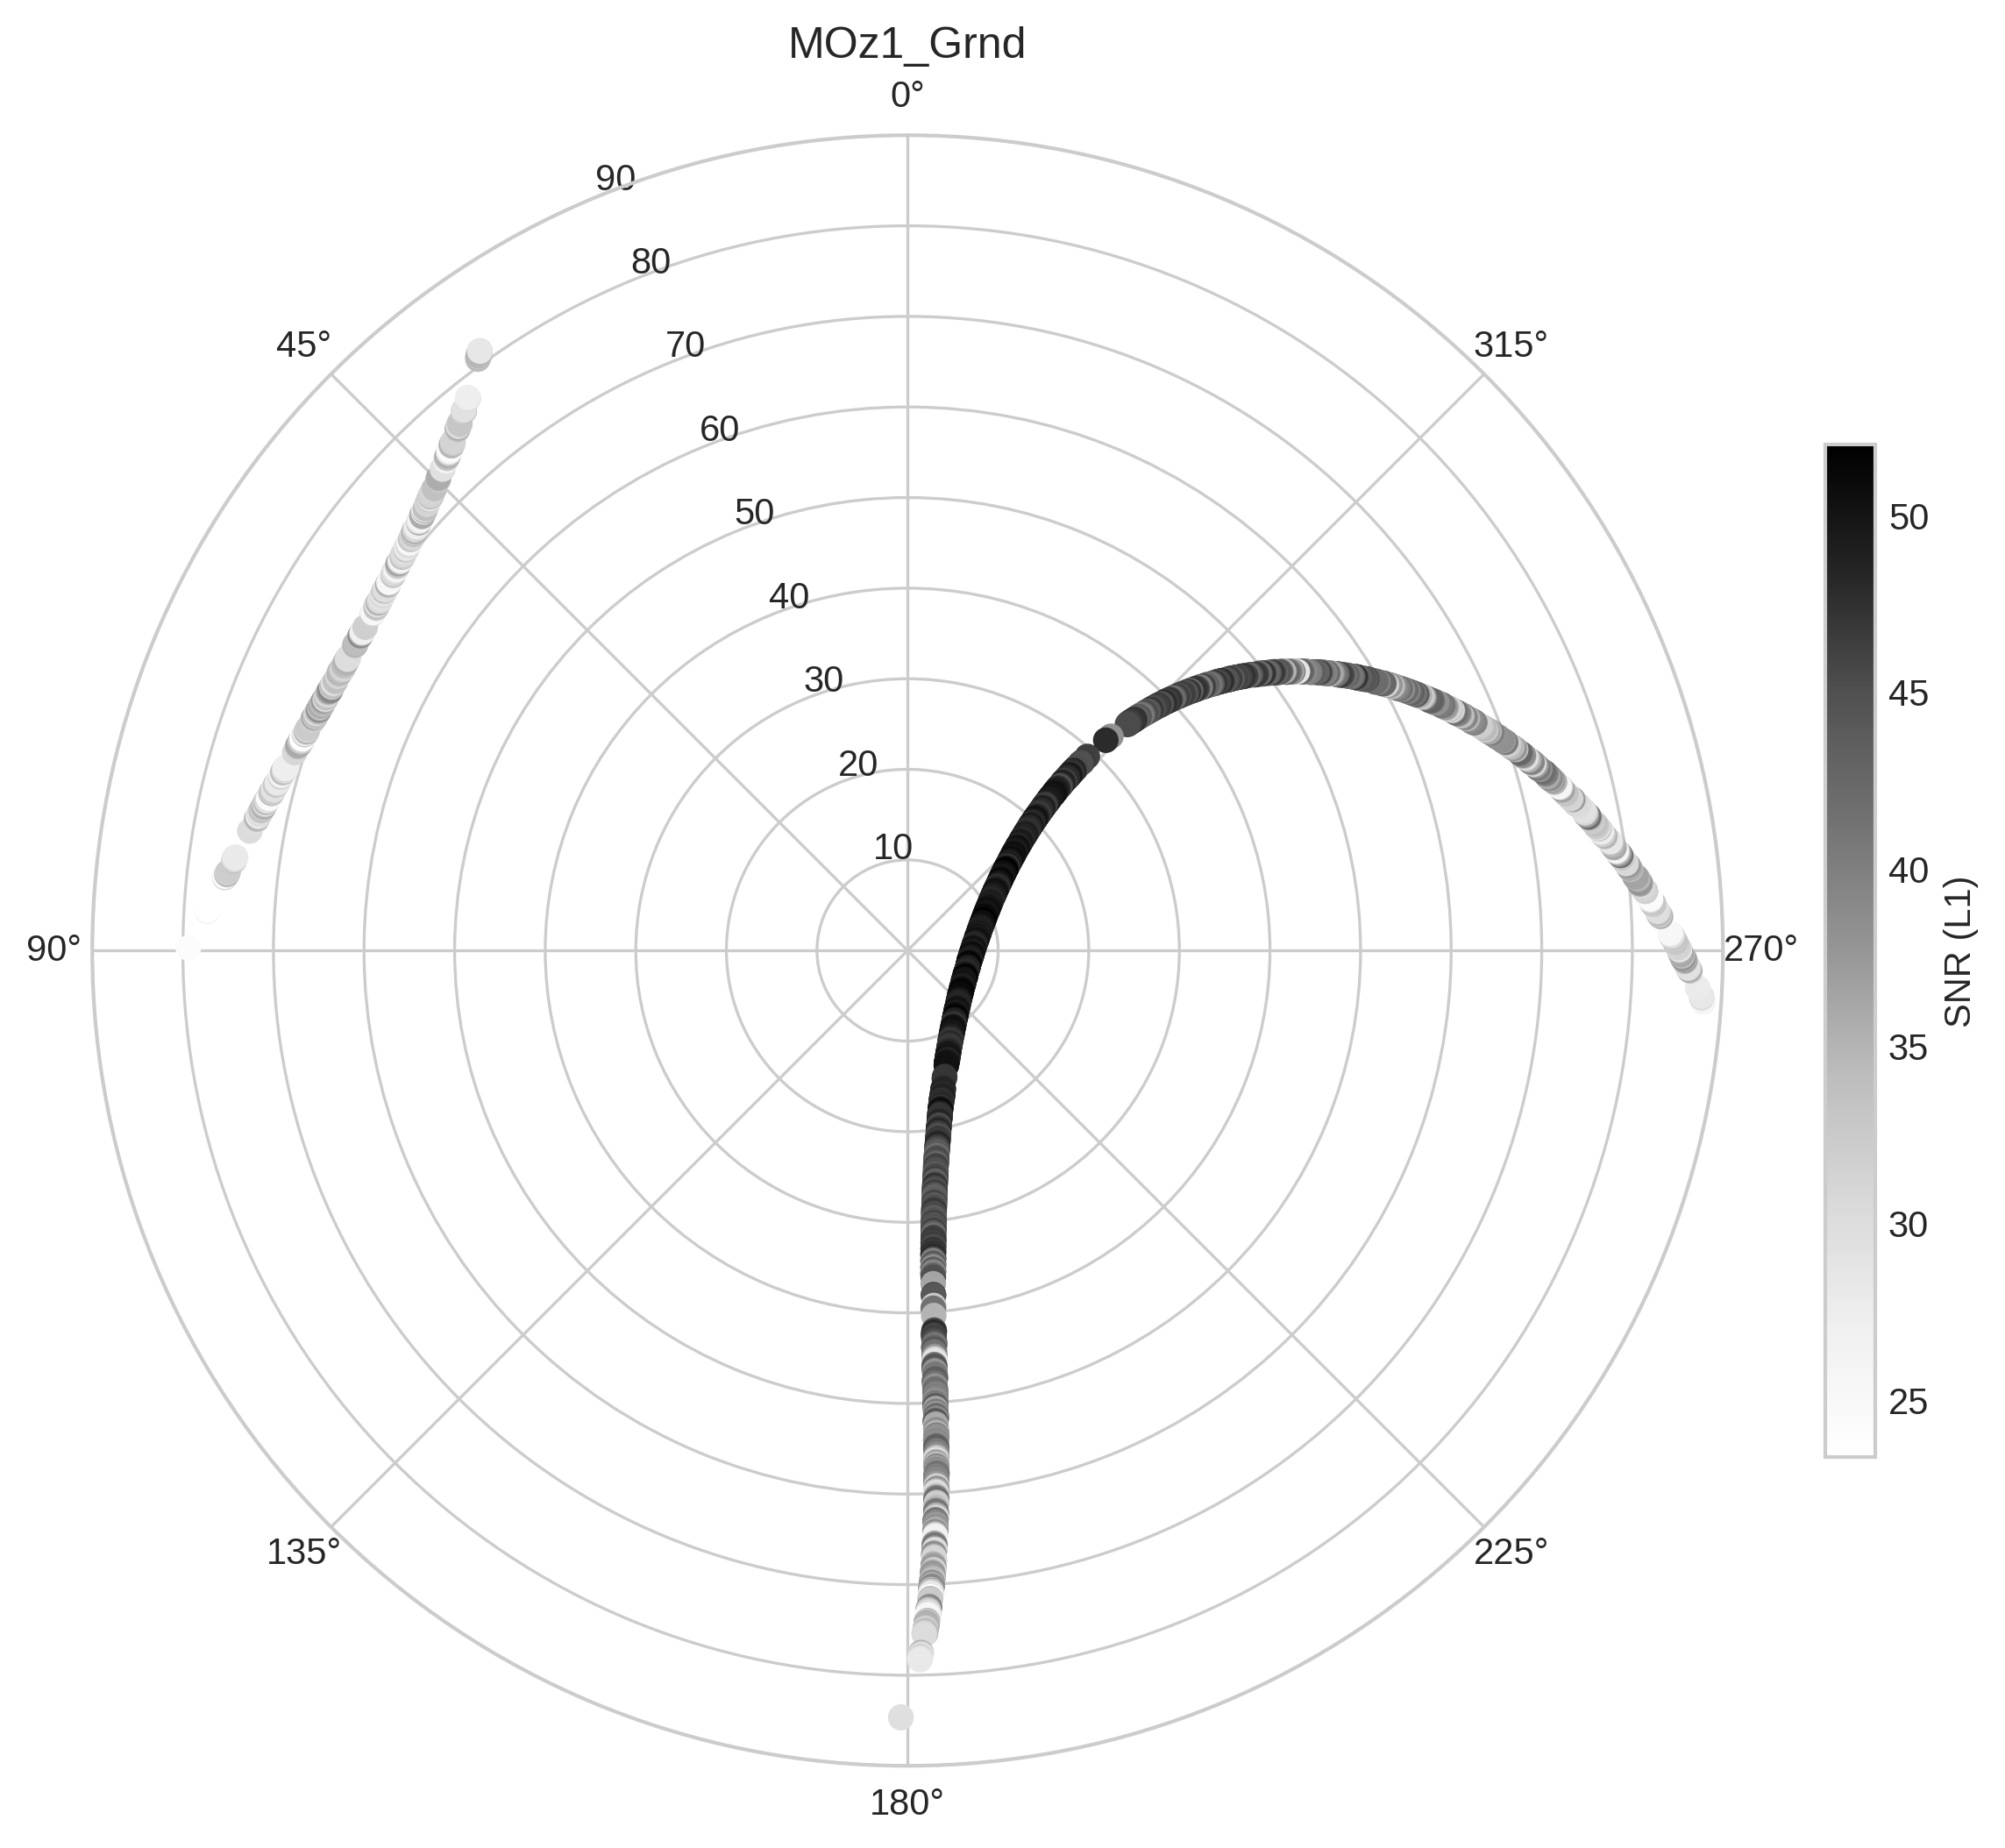

In [8]:
mySV = 'E03'
mystation_name = 'MOz1_Grnd'
# initialize figure with polar axes
fig, ax = plt.subplots(figsize=(10,10),subplot_kw=dict(projection='polar'))
# subset the dataset
subdf = df.xs(mySV,level='SV').xs(mystation_name,level='Station')

# polar plots need a radius and theta direction in radians
radius = 90-subdf.Elevation
theta = np.deg2rad(subdf.Azimuth)

# plot each measurement and color by signal to noise ratio
hs = ax.scatter(theta,radius,c=subdf.S1C)
ax.set_rlim([0,90])
ax.set_theta_zero_location("N")
plt.colorbar(hs, shrink=.5, label='SNR (L1)')
plt.title(mystation_name)

#### Single satellite, all sites

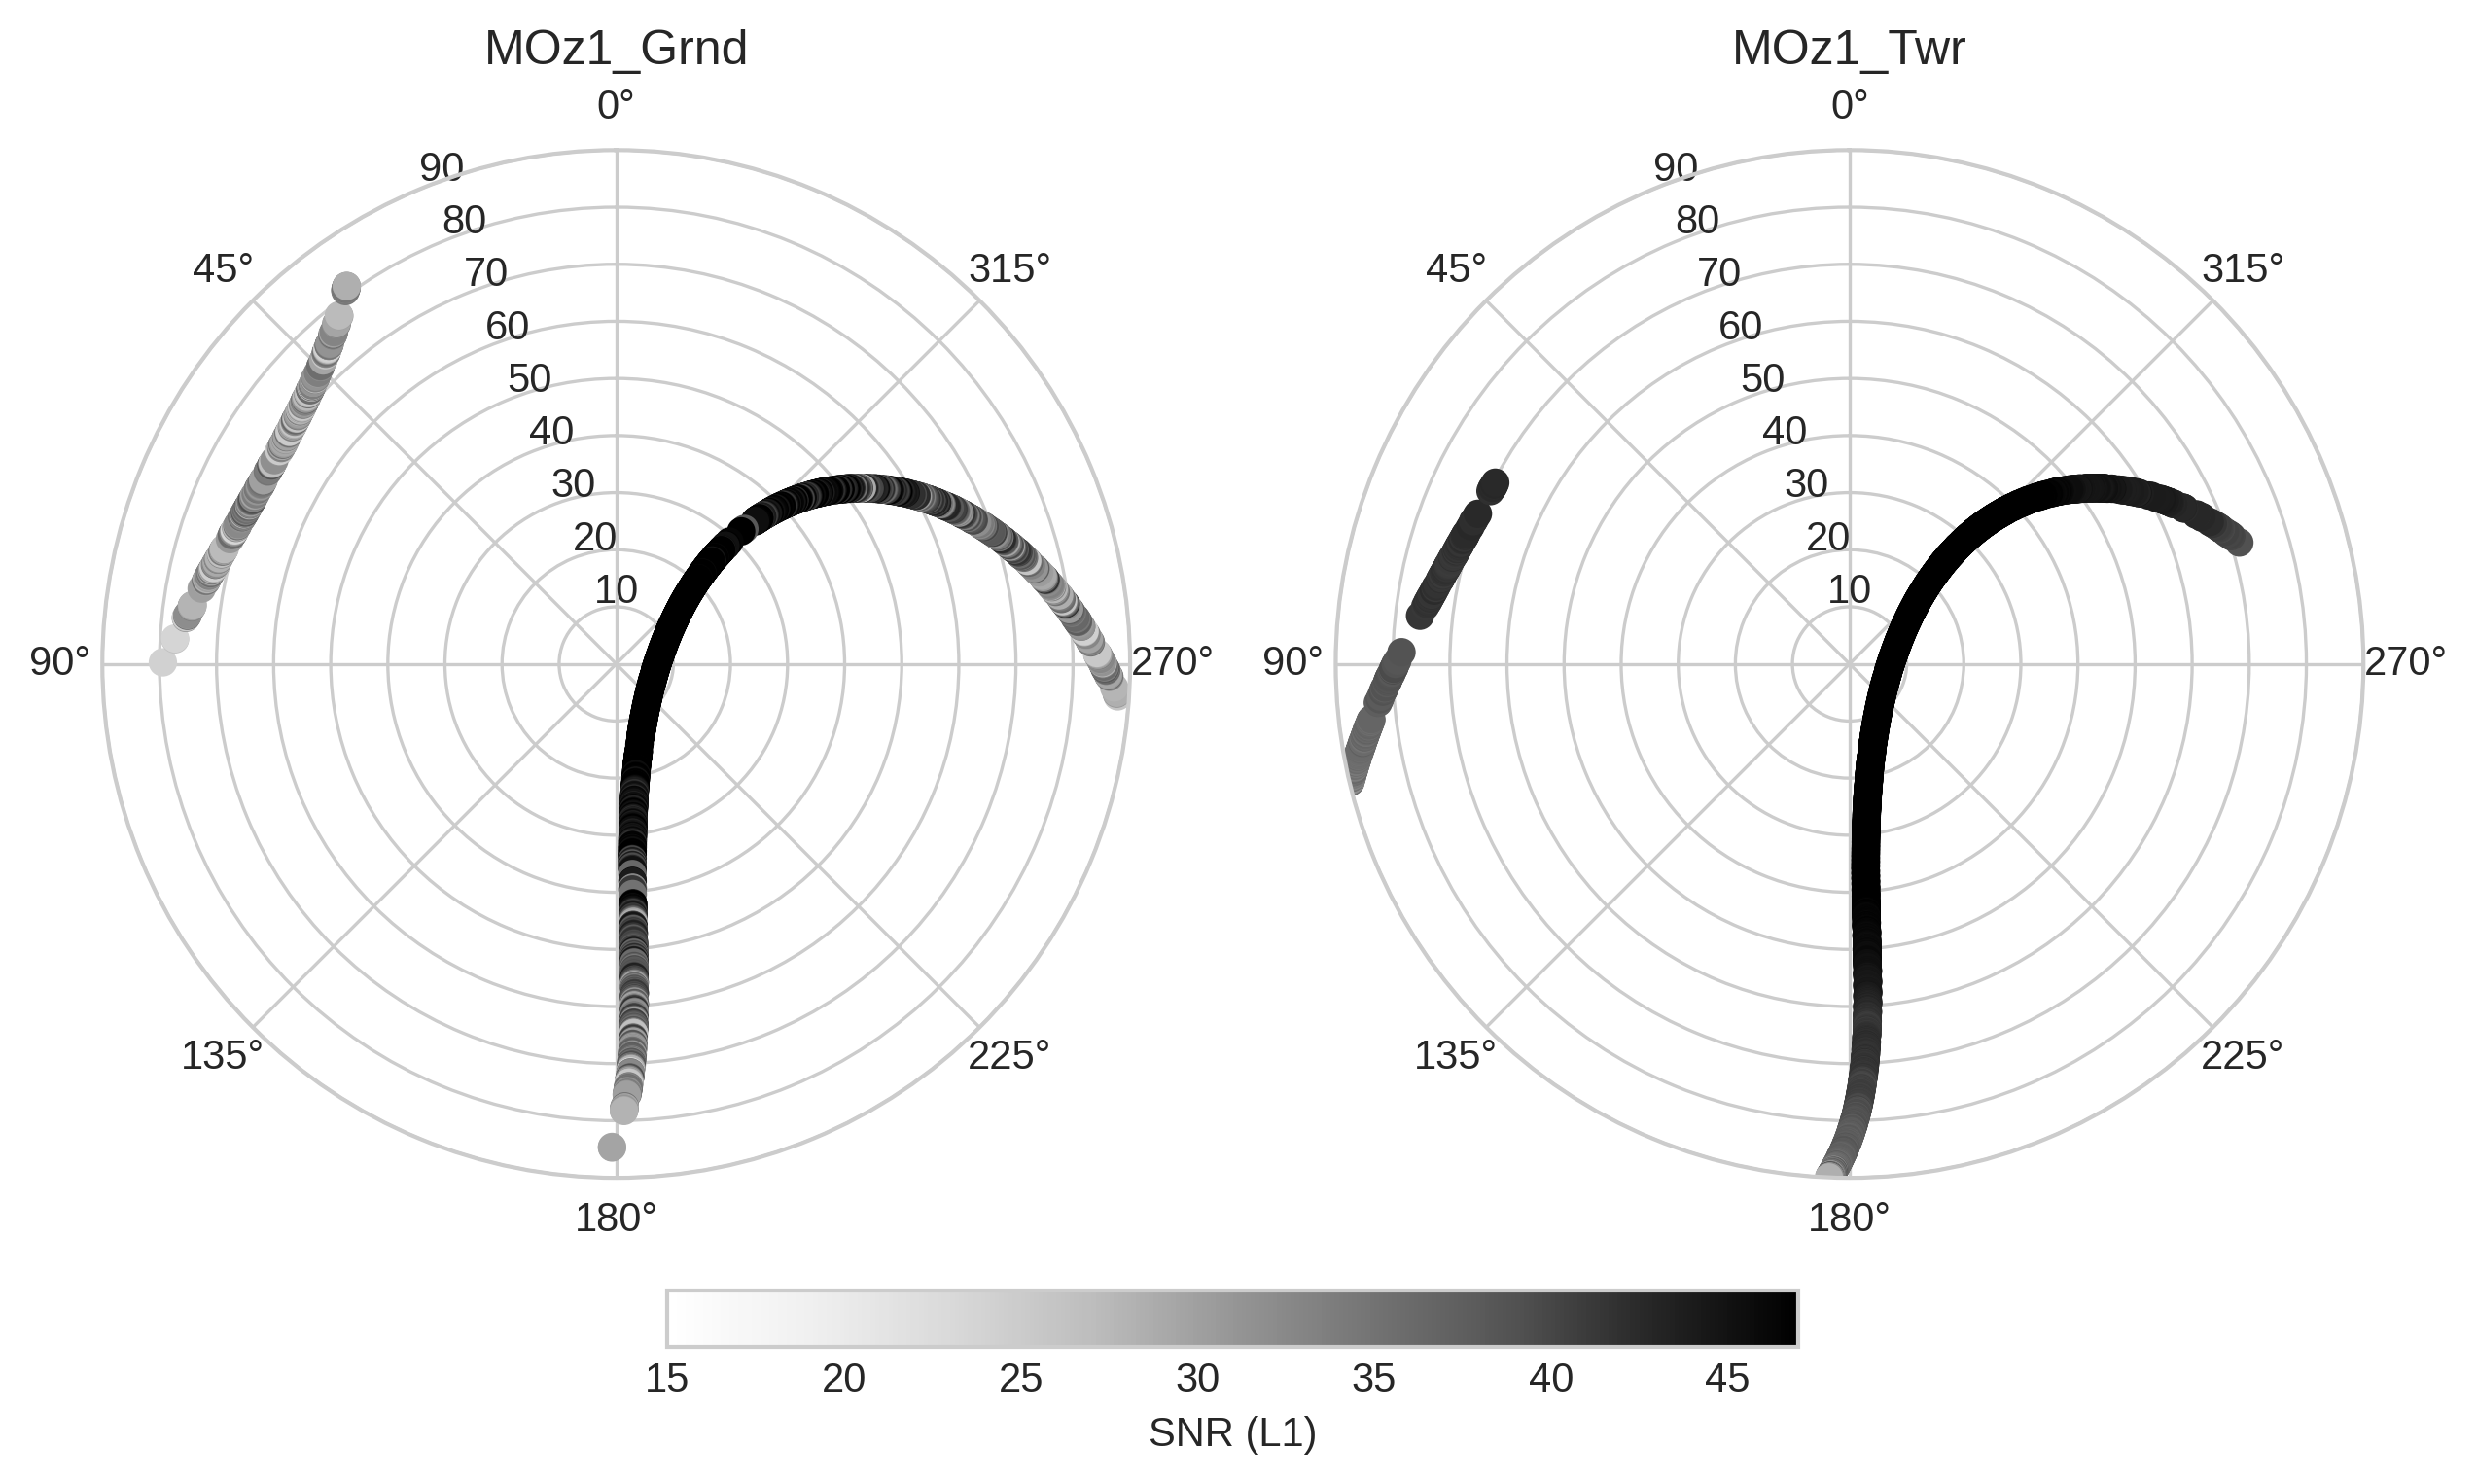

In [10]:
mySV = 'E03'
# get all sites as list
station_names = df.index.get_level_values('Station').unique()
# ensure we use the same color limits in all plots
clim = [15,47]
# initialize figure with polar axes
fig, ax = plt.subplots(1,len(station_names),figsize=(10,10),subplot_kw=dict(projection='polar'))
for i, iname in enumerate(station_names):
    # subset the dataset
    subdf = df.xs(mySV,level='SV').xs(iname,level='Station')
    # polar plots need a radius and theta direction in radians
    radius = 90-subdf.Elevation
    theta = np.deg2rad(subdf.Azimuth)
    # plot each measurement and color by signal to noise ratio
    hs = ax[i].scatter(theta,radius,c=subdf.S1C)
    hs.set_clim(clim)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(hs, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')

#### All satellites, all sites

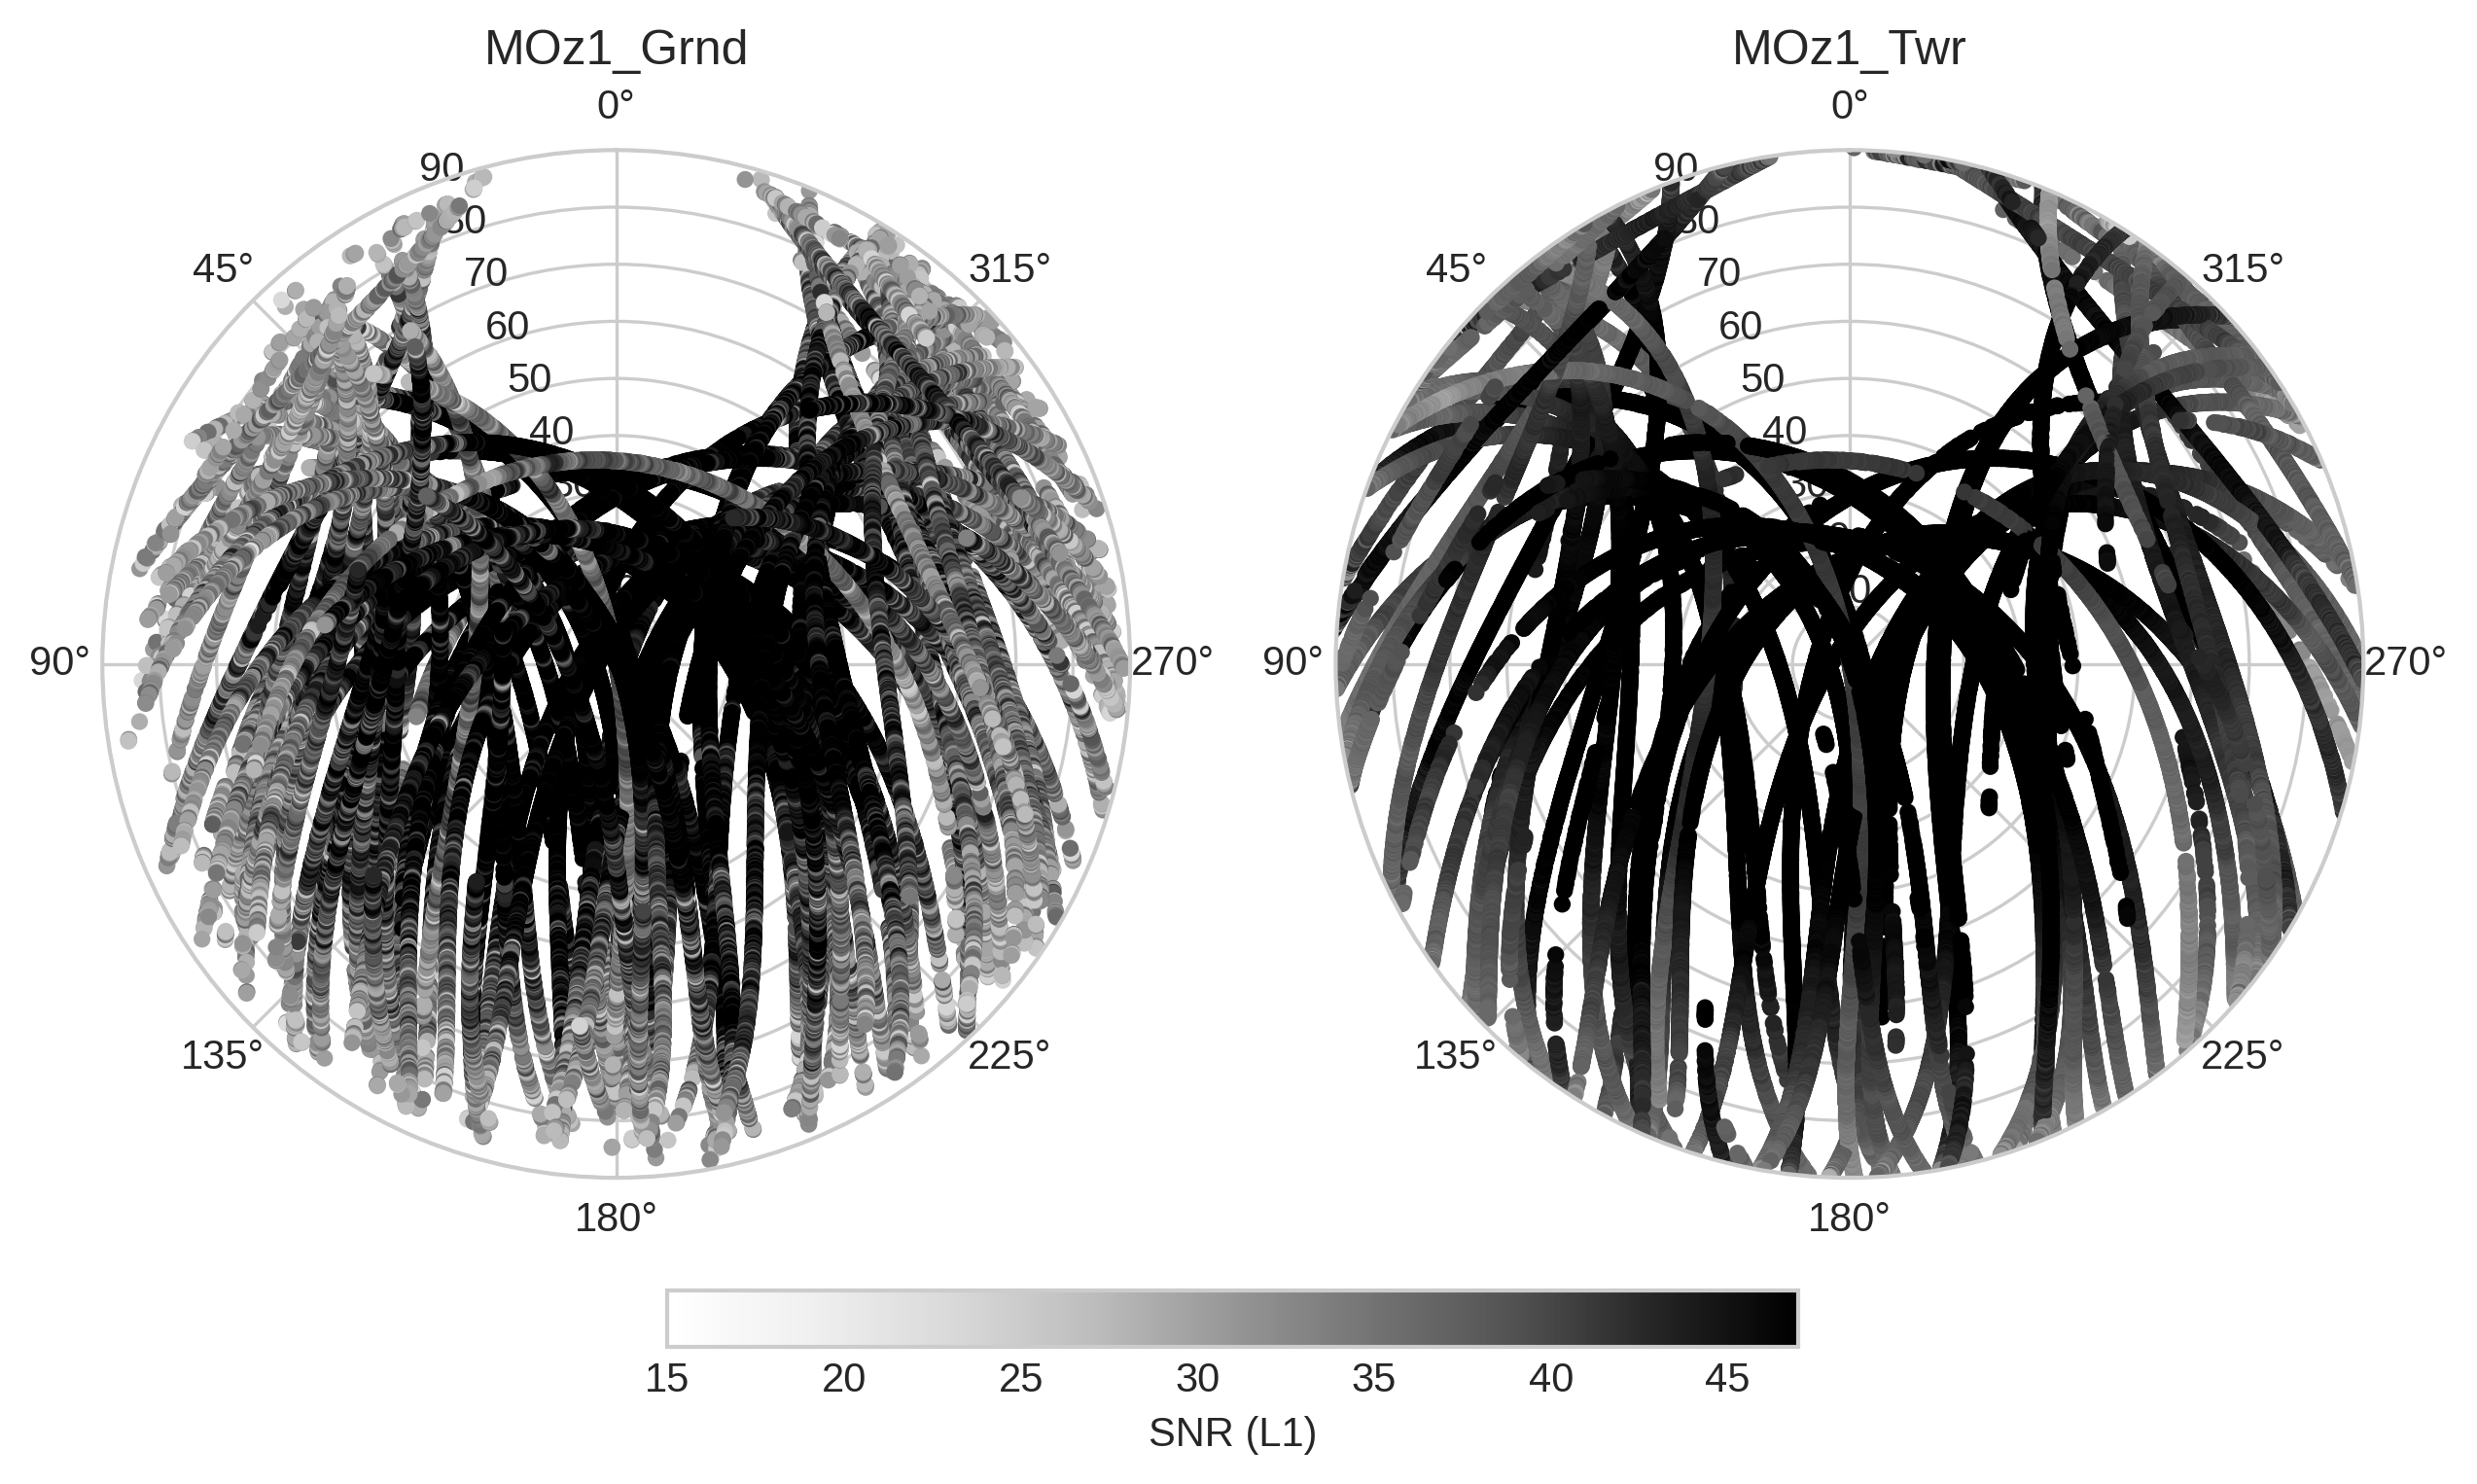

In [11]:
# get all sites as list
station_names = df.index.get_level_values('Station').unique()
# ensure we use the same color limits in all plots
clim = [15,47]
# initialize figure with polar axes
fig, ax = plt.subplots(1,len(station_names),figsize=(10,10),subplot_kw=dict(projection='polar'))
for i, iname in enumerate(station_names):
    # subset the dataset
    subdf = df.xs(iname,level='Station')
    # polar plots need a radius and theta direction in radians
    radius = 90-subdf.Elevation
    theta = np.deg2rad(subdf.Azimuth)
    # plot each measurement and color by signal to noise ratio
    hs = ax[i].scatter(theta,radius,c=subdf.S1C,s=10)
    hs.set_clim(clim)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(hs, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')

As expected, signal to noise is larger at the clear-sky (Dav2_Twr) site. We also see that SNR increases as a function of elevation. This mainly occurs because the GNSS antenna gain is strongest in the zenith direction.

We also see that no measurements can be found towards the North of the stations, this is because no GNSS satellites go over this area of the sky. 

Finally, to the West, measurements are missing below elevations of about 20°. This is because the surrounding terrain and the mountains are cutting off the line of sight to the satellite.

### Plotting observation points as time series

Text(0.5, 1.0, 'E03')

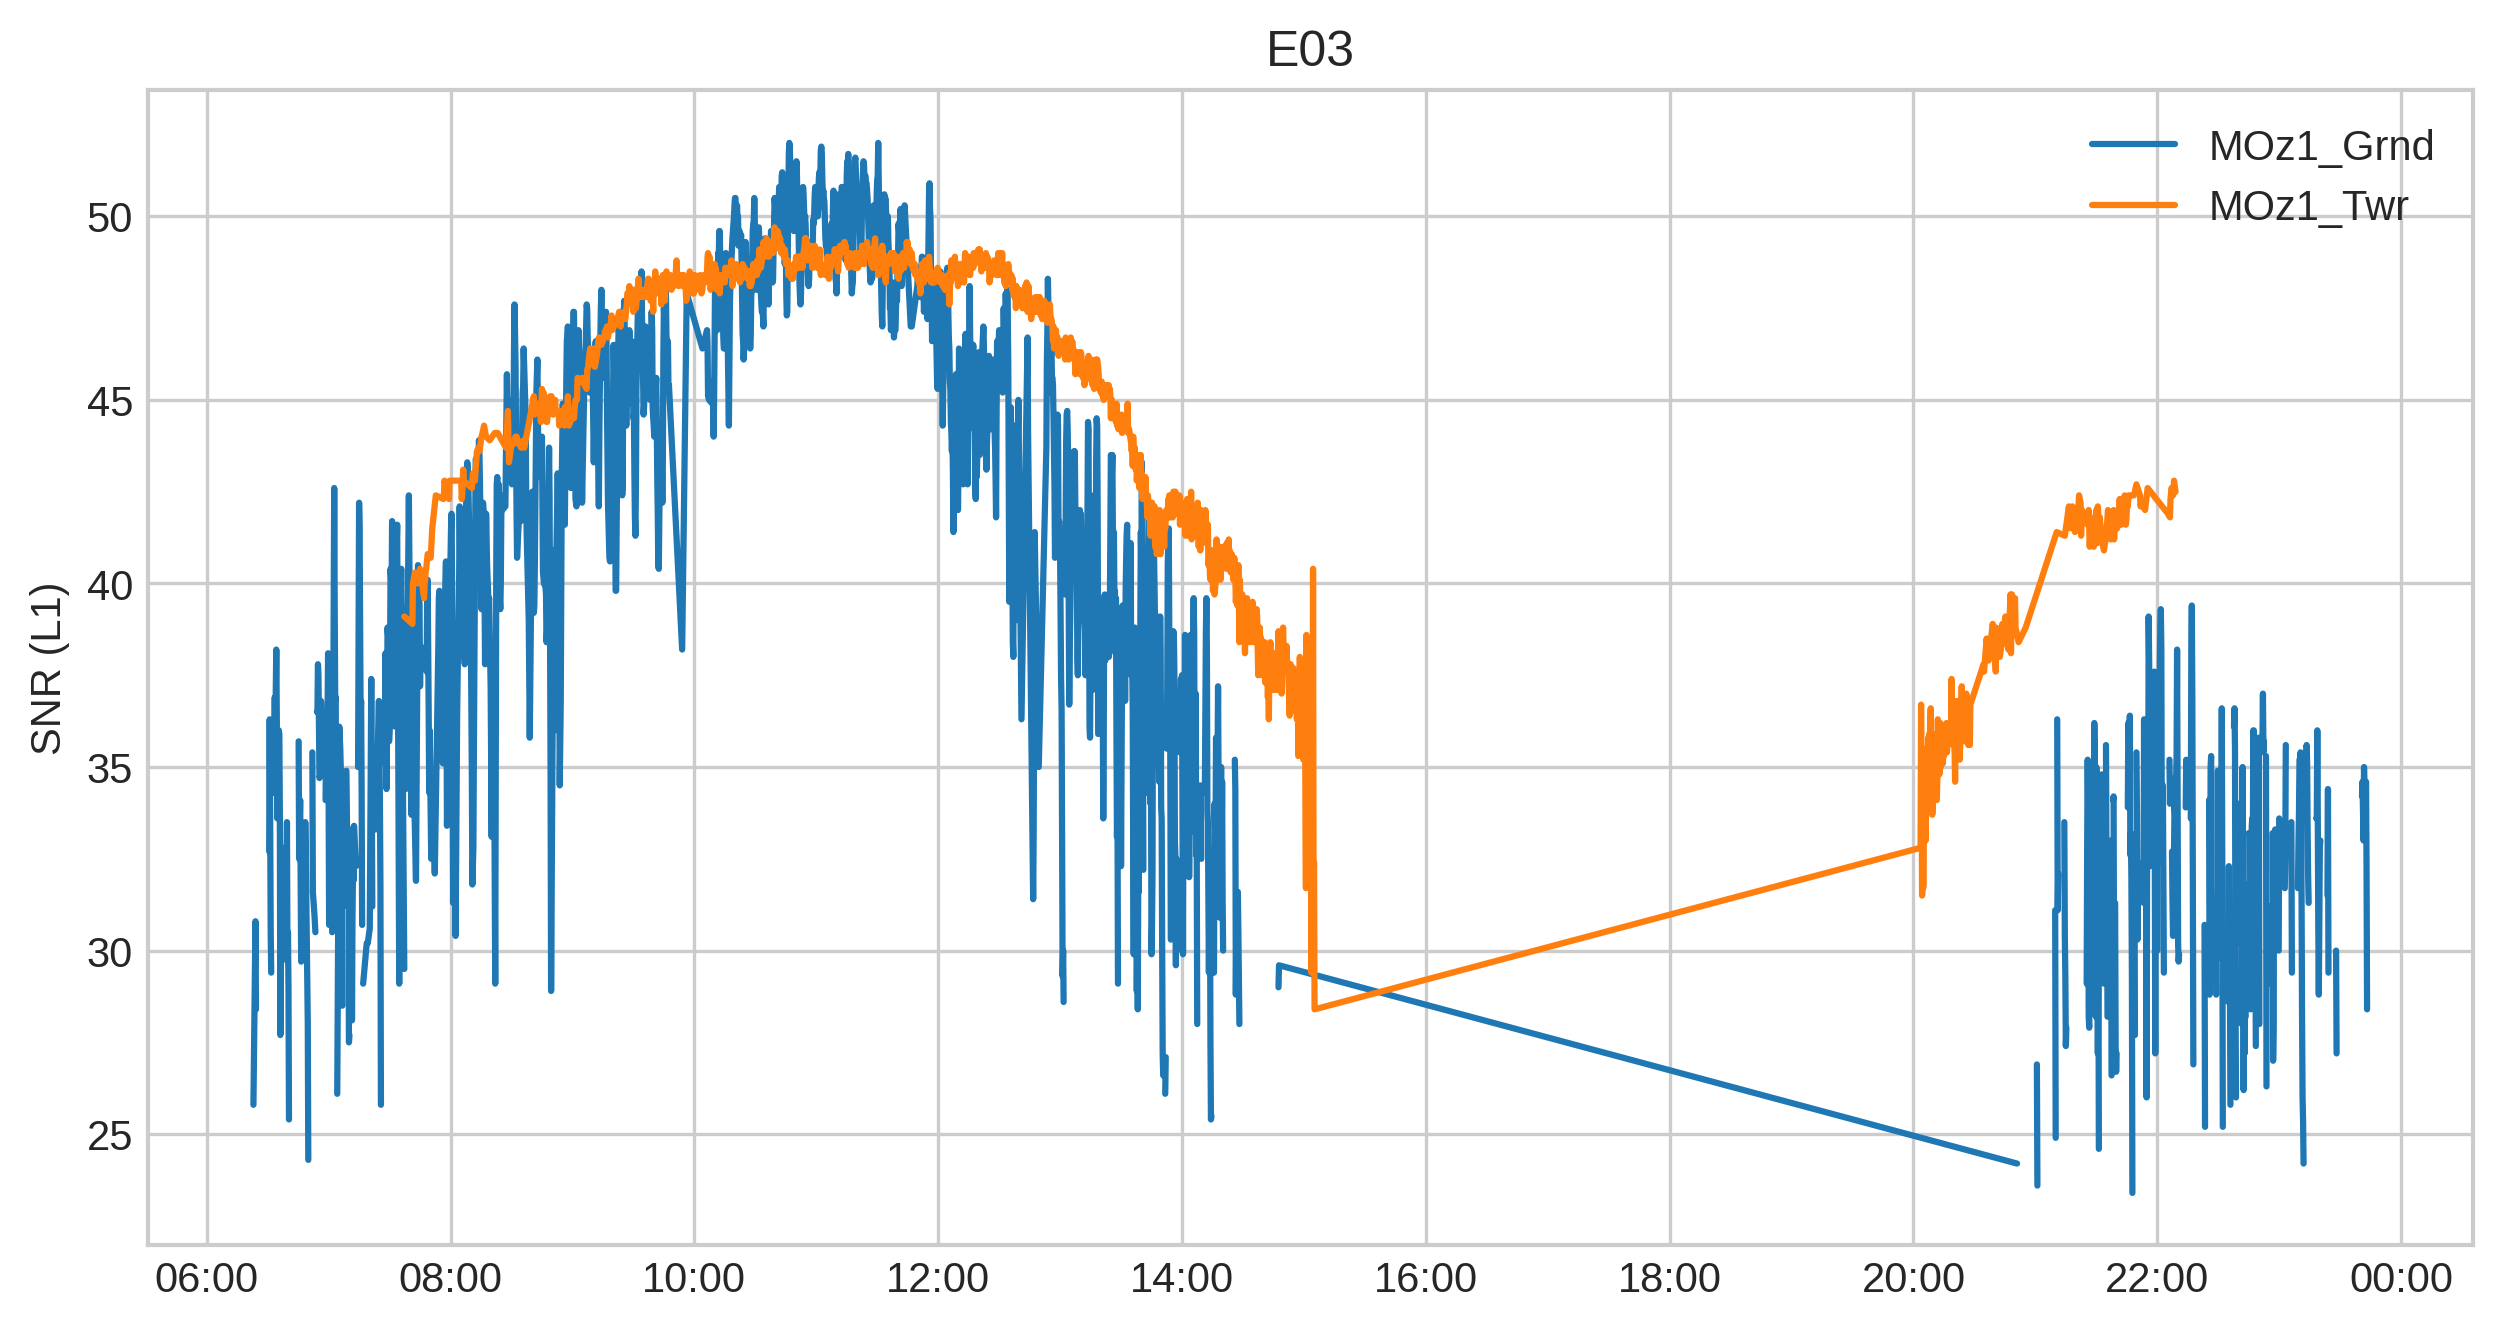

In [12]:
mySV = 'E03'
# get all sites as list
station_names = df.index.get_level_values('Station').unique()

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(station_names):
    # subset the dataset
    subdf = df.xs(iname,level='Station').xs(mySV,level='SV')
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(subdf.index.get_level_values('Epoch'),subdf.S1C,label=iname)
    
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(mySV)

Here we see several interesting features. In the beginning, the SNR of the clear-sky antenna (Dav2_Twr) increases over time as the satellite gets closer to the zenith, then starts to decrease after passing zenith.

We also observe oscillations of the clear-sky signal. These are likely the result of ground multipath reflections. The ground reflected signal reaches the receiver with a delay, causing an either constructive (signal enhancement) or destructive (signal attenuation) interference, in alternance as the satellite rises in the sky.

Finally, we see that the signal is severely attenuated at the subcanopy site, as the satellite is obscured by more or less dense parts of the canopy. Around 00:00-02:00 the satellite likely was moving through a gap in the canopy and the signal strength is more or less the same at the two receivers.

#### Geostationary satellites
Some of the logged satellites are geostationary (meaning they stay in the same spot in the sky) and have an "S" as prefix. These are satellites of the regional Satellite-based Augmentation Systems (SBAS), here the European Geostationary Navigation Overlay Service (EGNOS). These satellites broadcast correction information calculated in real time, which improves positioning (if your GNSS receiver has the ability to receive it).

As they have a fixed position in the sky, they do not sample the whole canopy. As a result, their signals are much more constant over time.

Index(['MOz1_Grnd', 'MOz1_Twr'], dtype='object', name='Station')


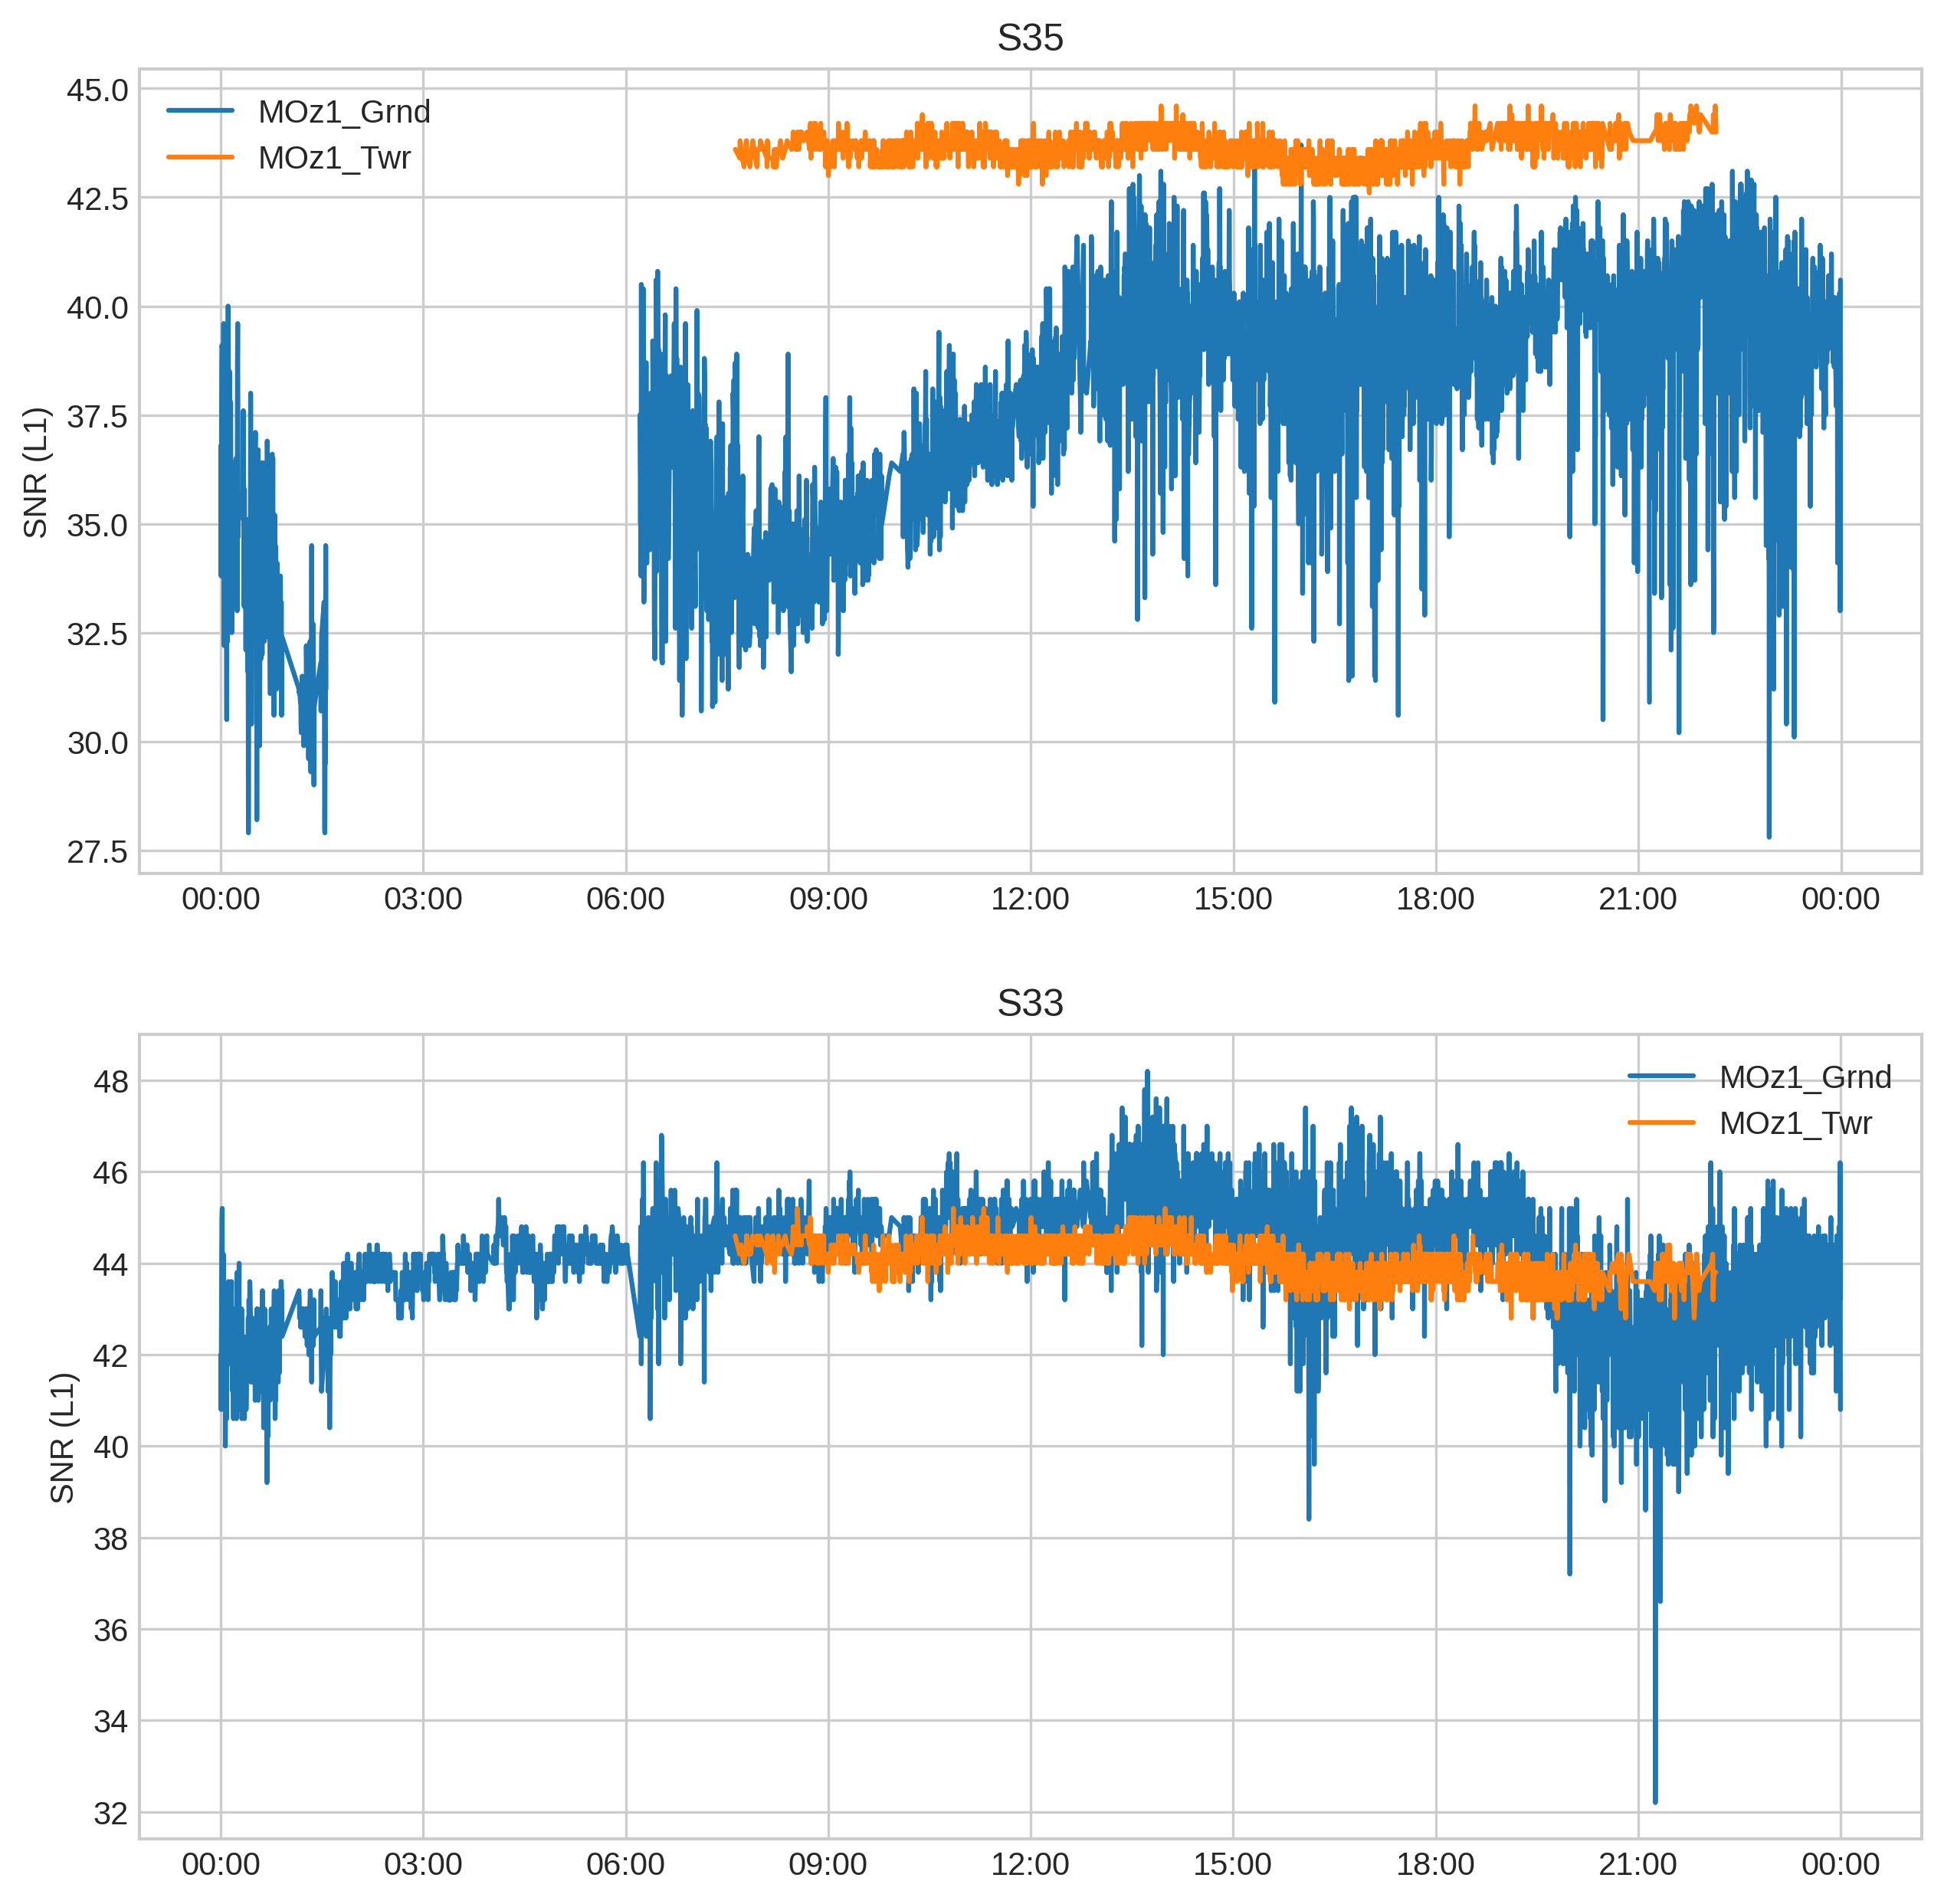

In [21]:
mySV = ['S35','S33']
# get all sites as list
station_names = df.index.get_level_values('Station').unique()
print(station_names)


fig, ax = plt.subplots(len(mySV),figsize=(10,10))
for isv, svname in enumerate(mySV):
    for i, iname in enumerate(station_names):
        # subset the dataset
        subdf = df.xs(iname,level='Station').xs(svname,level='SV')
        # plot each measurement and color by signal to noise ratio
        hs = ax[isv].plot(subdf.index.get_level_values('Epoch'),subdf.S1C,label=iname)
        
    myFmt = mdates.DateFormatter('%H:%M')
    ax[isv].xaxis.set_major_formatter(myFmt)
    ax[isv].set_ylabel('SNR (L1)')
    ax[isv].legend()
    ax[isv].set_title(svname)

Those measurements can be useful to diagnose other possible effects on SNR. For instance, the density of the atmosphere has an effect on SNR which can change over the day and will influence both stations similarly. The temperature of the sensing equipment (receiver, cables, antenna) can also vary over the day and have a small influence on SNR. 

The plateaus occurs because the SNR is encoded as an integer on the Reach M2 receiver. We are logging data every second, but we averaged to 15 seconds during preprocessing, explaing why we also have intermediate values.

Text(0.5, 1.0, 'S35')

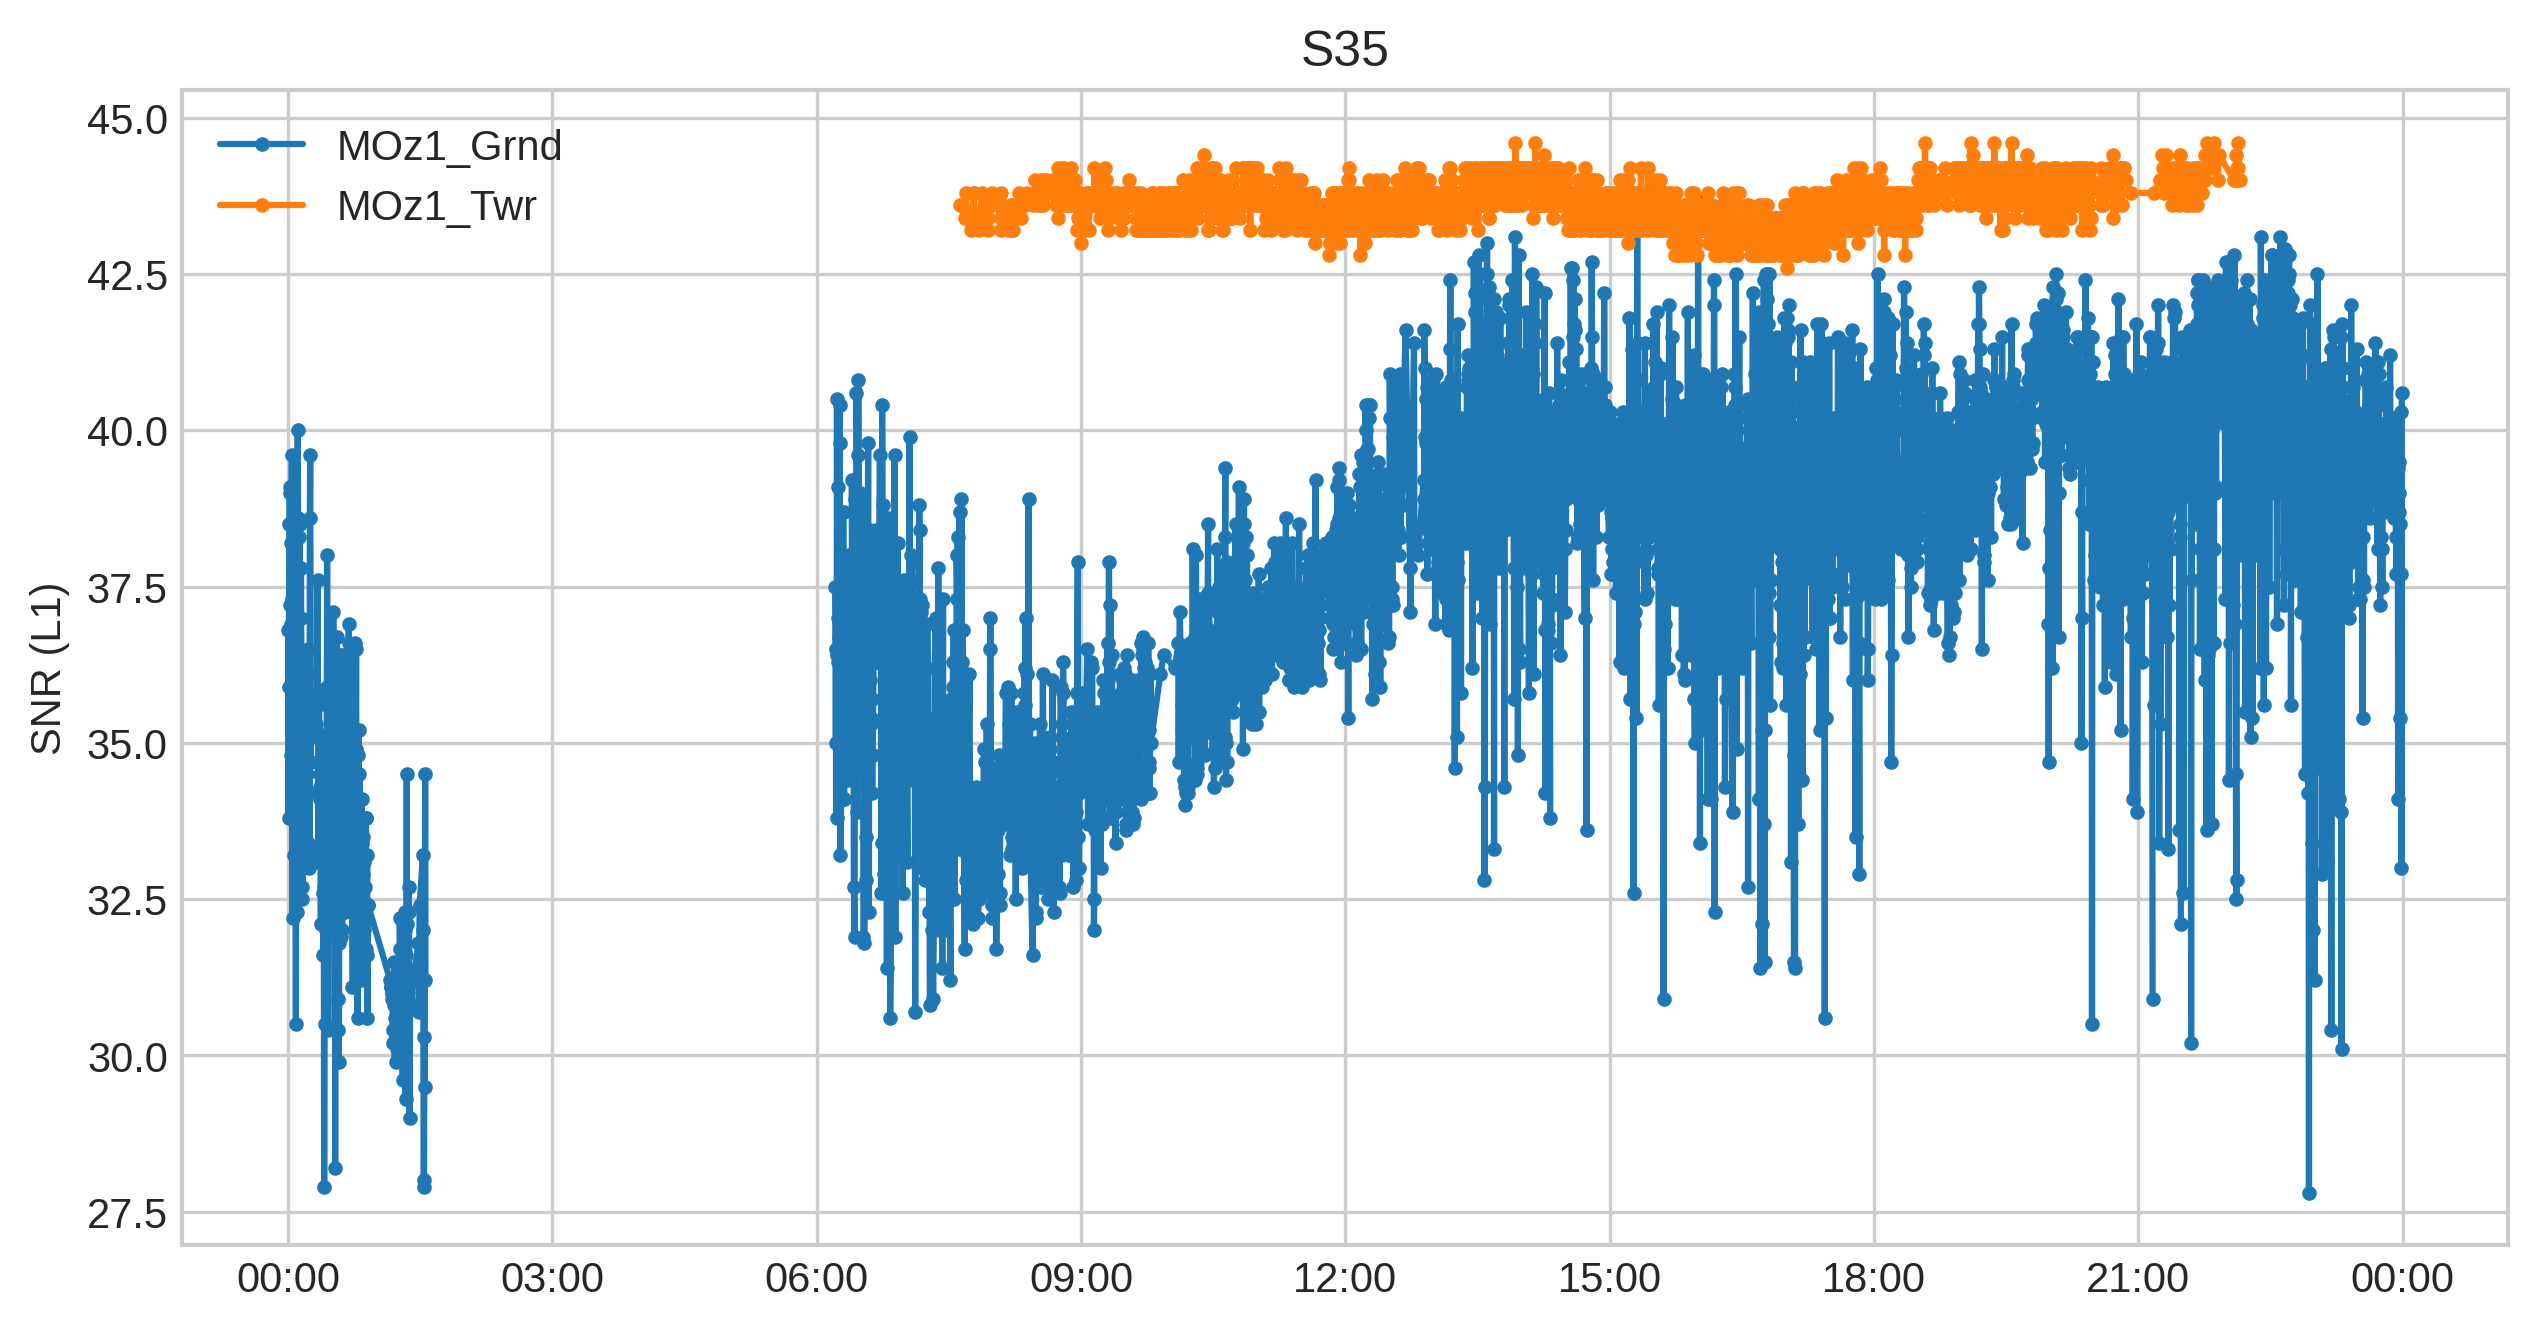

In [23]:
mySV = 'S35'
# get all sites as list
station_names = df.index.get_level_values('Station').unique()

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(station_names):
    # subset the dataset
    subdf = df.xs(iname,level='Station').xs(mySV,level='SV')
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(subdf.index.get_level_values('Epoch'),subdf.S1C,label=iname,marker='.',markersize=5)
    
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('SNR (L1)')
ax.legend()
plt.title(mySV)

For this geostationary satellite, there is an outlier at about 22:30 for Dav2_Twr, causing a rather awkward time series. 

If a satellite is barely visible or has poor health, the receiver may lose track of the signal for some amount of time (a loss of signal tracking is seen for Dav1_Grnd around 02:30 for instance). 

Since both receivers record similar signal strength, it is most likely that the geostationary satellite appears in a gap in the canopy and the subcanopy receiver has a clear line of sight as well.

We also see a significant jump at around 01:50. This happens if the transmit power of the satellite is changed (for any power management reason). Such jumps also occur with normal (non-geostationary) satellites but may be less obvious to detect. Because such jumps can occur anytime and on any satellite, it is always recommended to calculate the signal attenuation caused by the canopy (i.e. the difference between the two sensors) at the level of instantaneous observations. If we took here the average of Dav1_Grnd and compared it to the average of Dav2_Twr, Dav1_Grnd would have higher signal strength, but only because Dav2_Twr did not take as many measurements when 'S27' was transmitting at a higher power. In summary, calculate the difference first, then average.

### Calculating and plotting hemispheric averages
Note, here because we only use 6 hours worth of data, plotting individual measurements as we did above is still possible. However, when working with larger datasets, this quickly becomes impractical. `gnssvod` offers a solution to calculate statistics (like an average) over a hemispheric grid.
#### Hemispheric grid objects
The `Hemi` class is a convenience class of `gnssvod` for creating, using, and plotting hemispheric grid objects.

They are constructed by specifying the desired angular resolution of cells in degrees. The smaller the angular resolution, the finer the grid.

In [24]:
hemi = gv.hemibuild(4)
hemi

Hemi objects contain the following attributes:
- hemi.angular_resolution = the angular resolution of the grid
- hemi.ncells = the total number of cells
- hemi.grid = a pandas dataframe containing information of every grid cell

and methods:
- hemi.patches() = returns a pandas Series of grid cell patches that are used for plotting
- hemi.add_CellID() = is used to assign CellIDs to an existing dataframe of GNSS measurements

In [25]:
hemi.grid

azi   ele      azimin      azimax  elemin  elemax
CellID                                                          
0         0.000000  90.0    0.000000  360.000000    88.0    90.0
1        22.500000  86.0    0.000000   45.000000    84.0    88.0
2        67.500000  86.0   45.000000   90.000000    84.0    88.0
3       112.500000  86.0   90.000000  135.000000    84.0    88.0
4       157.500000  86.0  135.000000  180.000000    84.0    88.0
...            ...   ...         ...         ...     ...     ...
1523    345.789474   6.0  344.210526  347.368421     4.0     8.0
1524    348.947368   6.0  347.368421  350.526316     4.0     8.0
1525    352.105263   6.0  350.526316  353.684211     4.0     8.0
1526    355.263158   6.0  353.684211  356.842105     4.0     8.0
1527    358.421053   6.0  356.842105  360.000000     4.0     8.0

[1528 rows x 6 columns]

To plot the grid, we first retrieve the patches:

In [26]:
# get patches
patches = hemi.patches() 
patches

CellID
0       Rectangle(xy=(0, 0), width=6.28319, height=2, ...
1       Rectangle(xy=(0, 2), width=0.785398, height=4,...
2       Rectangle(xy=(0.785398, 2), width=0.785398, he...
3       Rectangle(xy=(1.5708, 2), width=0.785398, heig...
4       Rectangle(xy=(2.35619, 2), width=0.785398, hei...
                              ...                        
1523    Rectangle(xy=(6.00761, 82), width=0.0551157, h...
1524    Rectangle(xy=(6.06272, 82), width=0.0551157, h...
1525    Rectangle(xy=(6.11784, 82), width=0.0551157, h...
1526    Rectangle(xy=(6.17295, 82), width=0.0551157, h...
1527    Rectangle(xy=(6.22807, 82), width=0.0551157, h...
Name: Patches, Length: 1528, dtype: object

Creating the patches can take time, especially if there are many. With an angular resolution of 6° and 693 patches, this is still quite fast, but at 0.1°, it will take a lot of time. This is why patches are only calculated if the method `.patches()` is called by the user and are otherwise not calculated by default when calling `hemibuild`

The patches can then be easily plotted as follows:

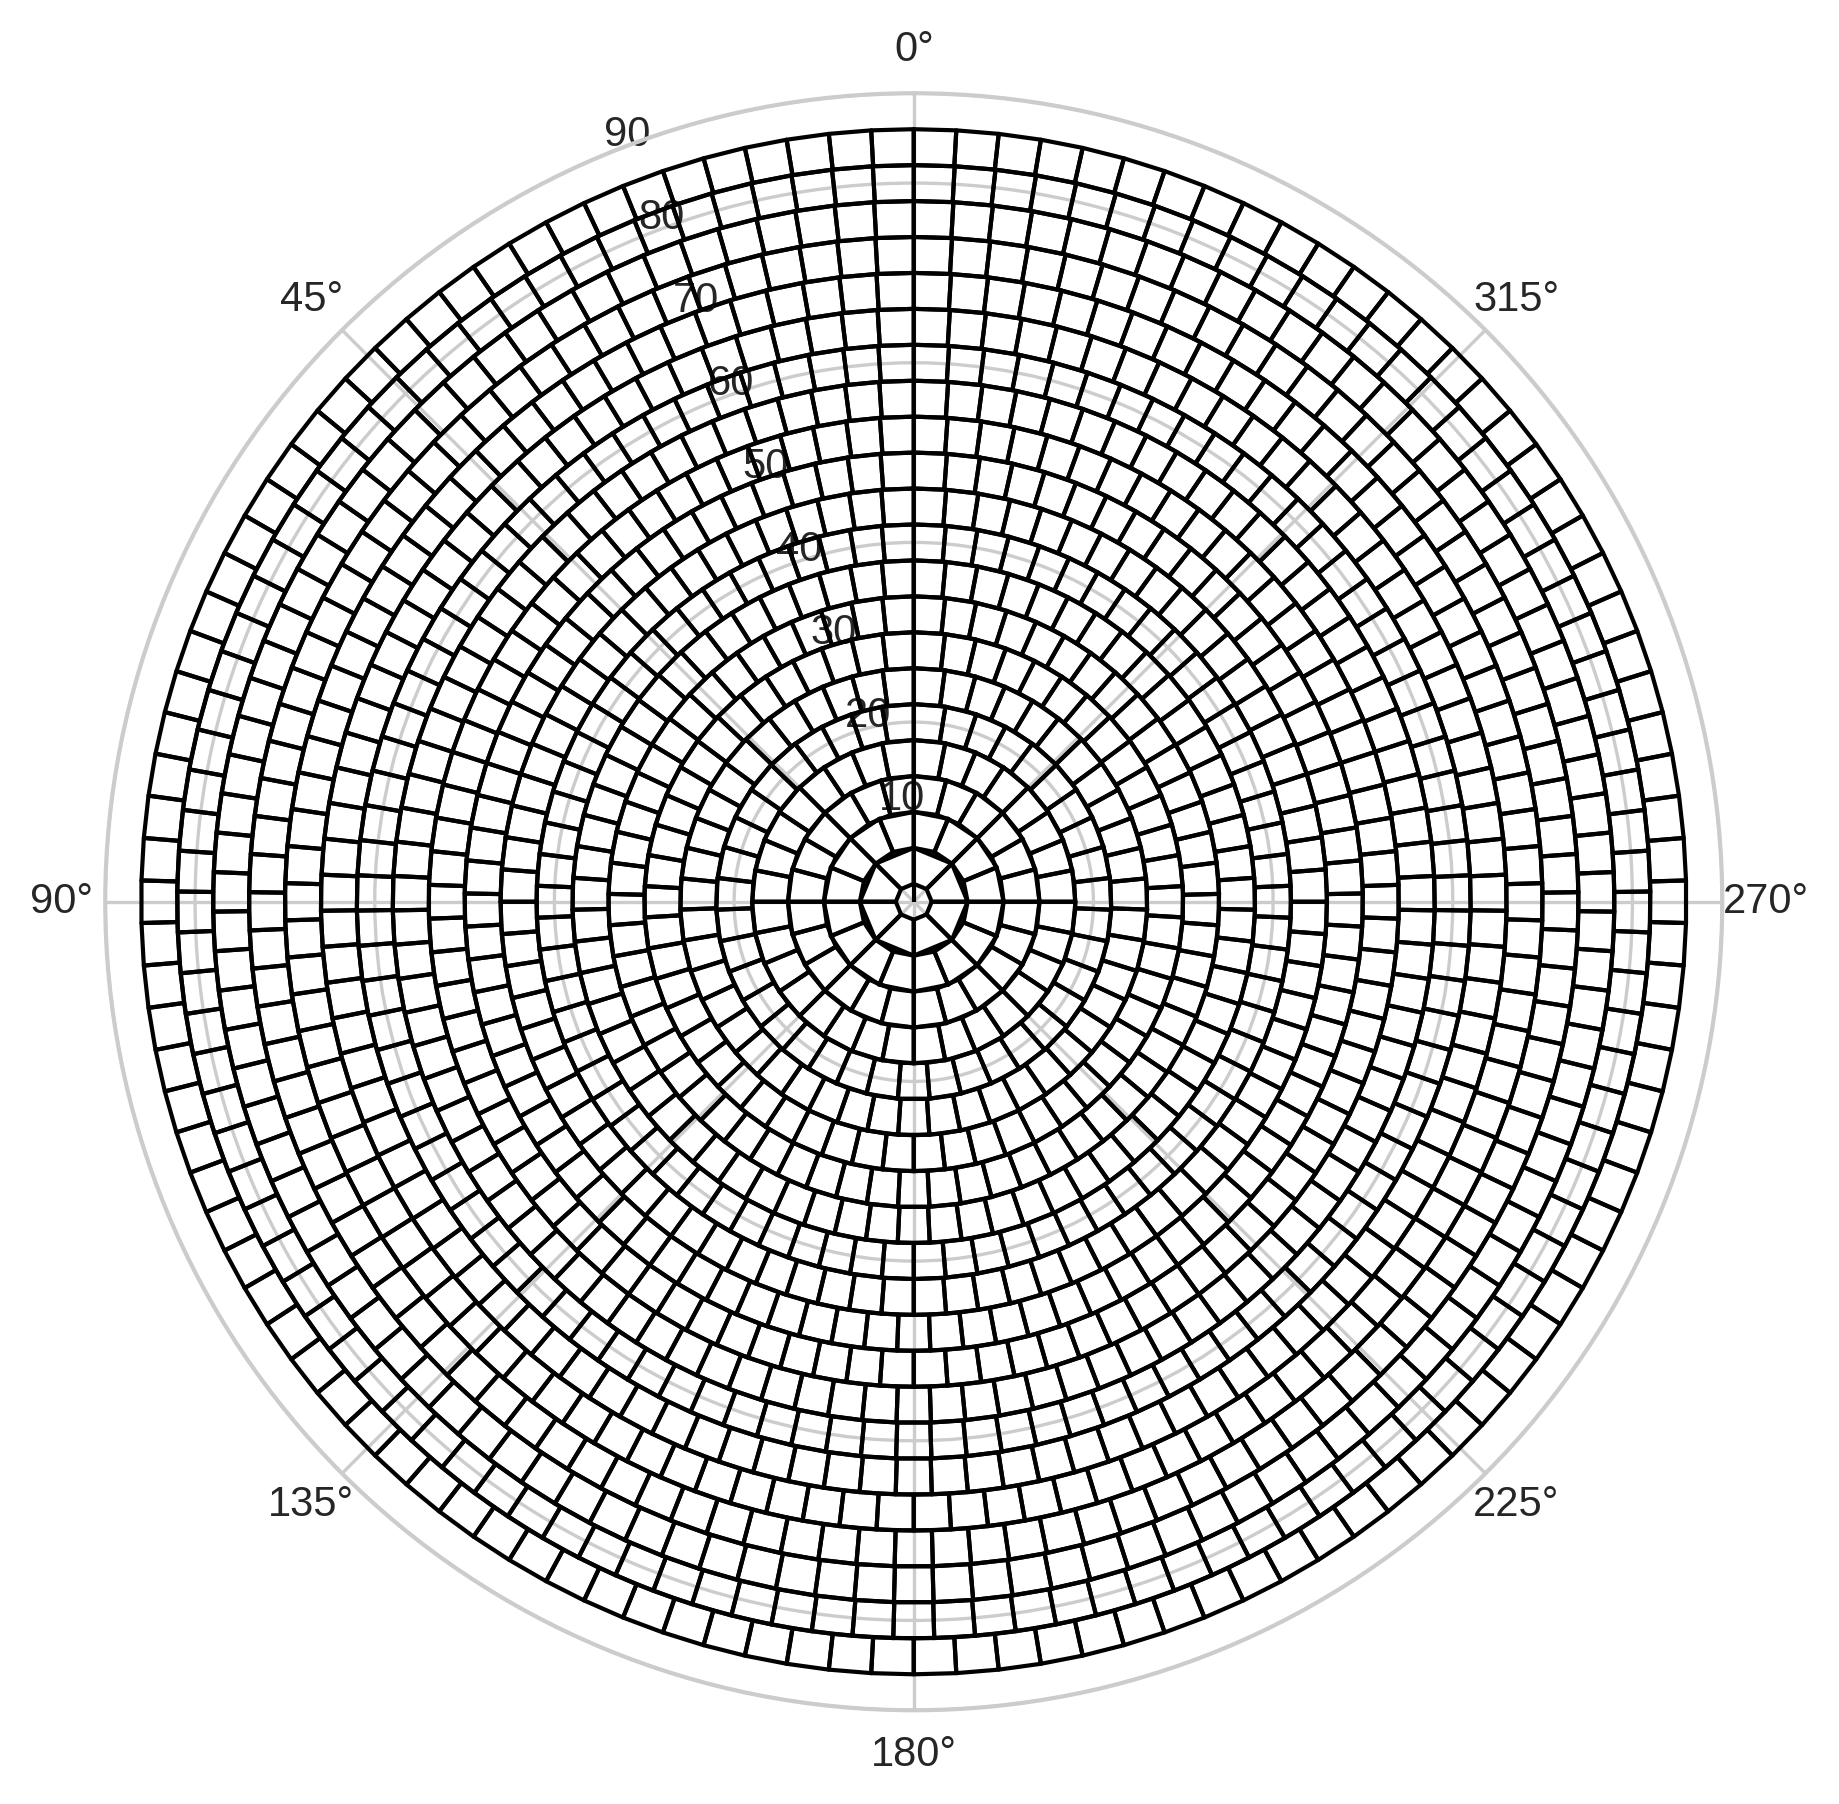

In [27]:
fig, ax = plt.subplots(figsize=(7,7),subplot_kw=dict(projection='polar'))
pc = PatchCollection(patches.values,facecolor='none',linewidth=1)
#ax.bar(0, 1).remove() # bar hack to force curved patch edges, activate this if the patches look square and not curved
ax.add_collection(pc)
ax.set_rlim([0,90])
ax.set_theta_zero_location("N")

#### Assigning measurements to grid cells
The `hemi.add_CellID()` method is used to assign a CellID to an existing dataframe of GNSS measurements.

`df = hemi.add_CellID(df, aziname='Azimuth', elename='Elevation', idname='CellID', drop=True)`

By default, it will assume that the dataframe `df` contains columns named Azimuth and Elevation, and that the CellID should be added to a new column named `CellID`. All these defaults can be easily overriden. `drop=True` means that measurements that do not fall within in any cell are dropped off (discarded from the df). This can concern a lot of measurements if you specificed a cutoff higher than 0 when using `hemibuild`.

In [28]:
newdf = hemi.add_CellID(df)
newdf

S1A   S1C   S1P  S1W  S1X  S1Z   S2C   S2I  \
Station   Epoch               SV                                                
MOz1_Grnd 2022-05-02 00:00:00 C12  NaN   NaN   NaN  NaN  NaN  NaN   NaN  30.2   
                              C19  NaN   NaN  48.3  NaN  NaN  NaN   NaN  48.5   
                              C20  NaN   NaN   NaN  NaN  NaN  NaN   NaN  35.1   
                              C21  NaN   NaN   NaN  NaN  NaN  NaN   NaN   NaN   
                              C22  NaN   NaN  46.7  NaN  NaN  NaN   NaN  46.3   
...                                ...   ...   ...  ...  ...  ...   ...   ...   
MOz1_Twr  2022-05-02 22:09:00 R12  NaN  46.4  46.2  NaN  NaN  NaN  44.5   NaN   
                              R13  NaN  40.6  39.8  NaN  NaN  NaN  36.9   NaN   
                              R14  NaN  42.8  42.4  NaN  NaN  NaN  41.0   NaN   
                              R21  NaN  46.6  46.6  NaN  NaN  NaN  42.4   NaN   
                              R22  NaN  41.8  41.1  NaN  NaN  NaN  36.4   NaN   

                                   S2L   S2P  ...  S7Z  S1M  S2S  S1D  S6Q  \
Station   Epoch               SV              ...                            
MOz1_Grnd 2022-05-02 00:00:00 C12  NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              C19  NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              C20  NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              C21  NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN   
                              C22  NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN   
...                                ...   ...  ...  ...  ...  ...  ...  ...   
MOz1_Twr  2022-05-02 22:09:00 R12  NaN  44.0  ...  NaN  NaN  NaN  NaN  NaN   
                              R13  NaN  40.1  ...  NaN  NaN  NaN  NaN  NaN   
                              R14  NaN  40.1  ...  NaN  NaN  NaN  NaN  NaN   
                              R21  NaN  42.5  ...  NaN  NaN  NaN  NaN  NaN   
                              R22  NaN  36.2  ...  NaN  NaN  NaN  NaN  NaN   

                                   S7P  S3I  S3X  S1N  CellID  
Station   Epoch               SV                               
MOz1_Grnd 2022-05-02 00:00:00 C12  NaN  NaN  NaN  NaN     960  
                              C19  NaN  NaN  NaN  NaN     231  
                              C20  NaN  NaN  NaN  NaN    1313  
                              C21  NaN  NaN  NaN  NaN    1367  
                              C22  NaN  NaN  NaN  NaN     253  
...                                ...  ...  ...  ...     ...  
MOz1_Twr  2022-05-02 22:09:00 R12  NaN  NaN  NaN  NaN    1041  
                              R13  NaN  NaN  NaN  NaN     752  
                              R14  NaN  NaN  NaN  NaN    1406  
                              R21  NaN  NaN  NaN  NaN    1104  
                              R22  NaN  NaN  NaN  NaN     356  

[217173 rows x 47 columns]

It now becomes relatively easy to calculate any sort of statistics per grid cell using the base pandas functions.

In [29]:
hemi_average = newdf.groupby(['CellID','Station']).mean()
hemi_average

S1A        S1C        S1P        S1W        S1X  S1Z  \
CellID Station                                                           
0      MOz1_Grnd  NaN  46.883065  43.234091  44.425641        NaN  NaN   
       MOz1_Twr   NaN  45.869444  42.776471  44.462500        NaN  NaN   
1      MOz1_Grnd  NaN  47.960811  43.812766  41.801136        NaN  NaN   
       MOz1_Twr   NaN  48.186555  43.536111  45.262963        NaN  NaN   
2      MOz1_Grnd  NaN  48.827397  49.546667  42.418919  47.811111  NaN   
...               ...        ...        ...        ...        ...  ...   
1520   MOz1_Twr   NaN  37.924603  37.158730        NaN        NaN  NaN   
1521   MOz1_Grnd  NaN  33.635294  32.318182        NaN        NaN  NaN   
       MOz1_Twr   NaN  43.008451  42.149296        NaN        NaN  NaN   
1522   MOz1_Grnd  NaN  29.500000  31.400000        NaN        NaN  NaN   
       MOz1_Twr   NaN  42.960000  42.020000        NaN        NaN  NaN   

                        S2C        S2I        S2L        S2P  ...  S5D  S7Z  \
CellID Station                                                ...             
0      MOz1_Grnd  45.906250  52.491667  47.594872  46.562500  ...  NaN  NaN   
       MOz1_Twr   47.811538  51.700000  48.325000  48.207692  ...  NaN  NaN   
1      MOz1_Grnd  44.615385  50.752381  45.601136  45.169231  ...  NaN  NaN   
       MOz1_Twr   47.415385  51.900000  47.268519  48.003846  ...  NaN  NaN   
2      MOz1_Grnd        NaN  51.010000  48.581081        NaN  ...  NaN  NaN   
...                     ...        ...        ...        ...  ...  ...  ...   
1520   MOz1_Twr   37.067308        NaN        NaN  37.400962  ...  NaN  NaN   
1521   MOz1_Grnd  31.797297        NaN        NaN  32.550000  ...  NaN  NaN   
       MOz1_Twr   36.961972        NaN        NaN  36.809859  ...  NaN  NaN   
1522   MOz1_Grnd  28.800000        NaN        NaN        NaN  ...  NaN  NaN   
       MOz1_Twr   38.200000        NaN        NaN  38.240000  ...  NaN  NaN   

                  S1M  S2S  S1D  S6Q  S7P  S3I  S3X  S1N  
CellID Station                                            
0      MOz1_Grnd  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
       MOz1_Twr   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1      MOz1_Grnd  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
       MOz1_Twr   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2      MOz1_Grnd  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...               ...  ...  ...  ...  ...  ...  ...  ...  
1520   MOz1_Twr   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1521   MOz1_Grnd  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
       MOz1_Twr   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1522   MOz1_Grnd  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
       MOz1_Twr   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2647 rows x 46 columns]

We can now plot this data in grid form. Here we look at the mean signal to noise ratio (SNR) at each site.

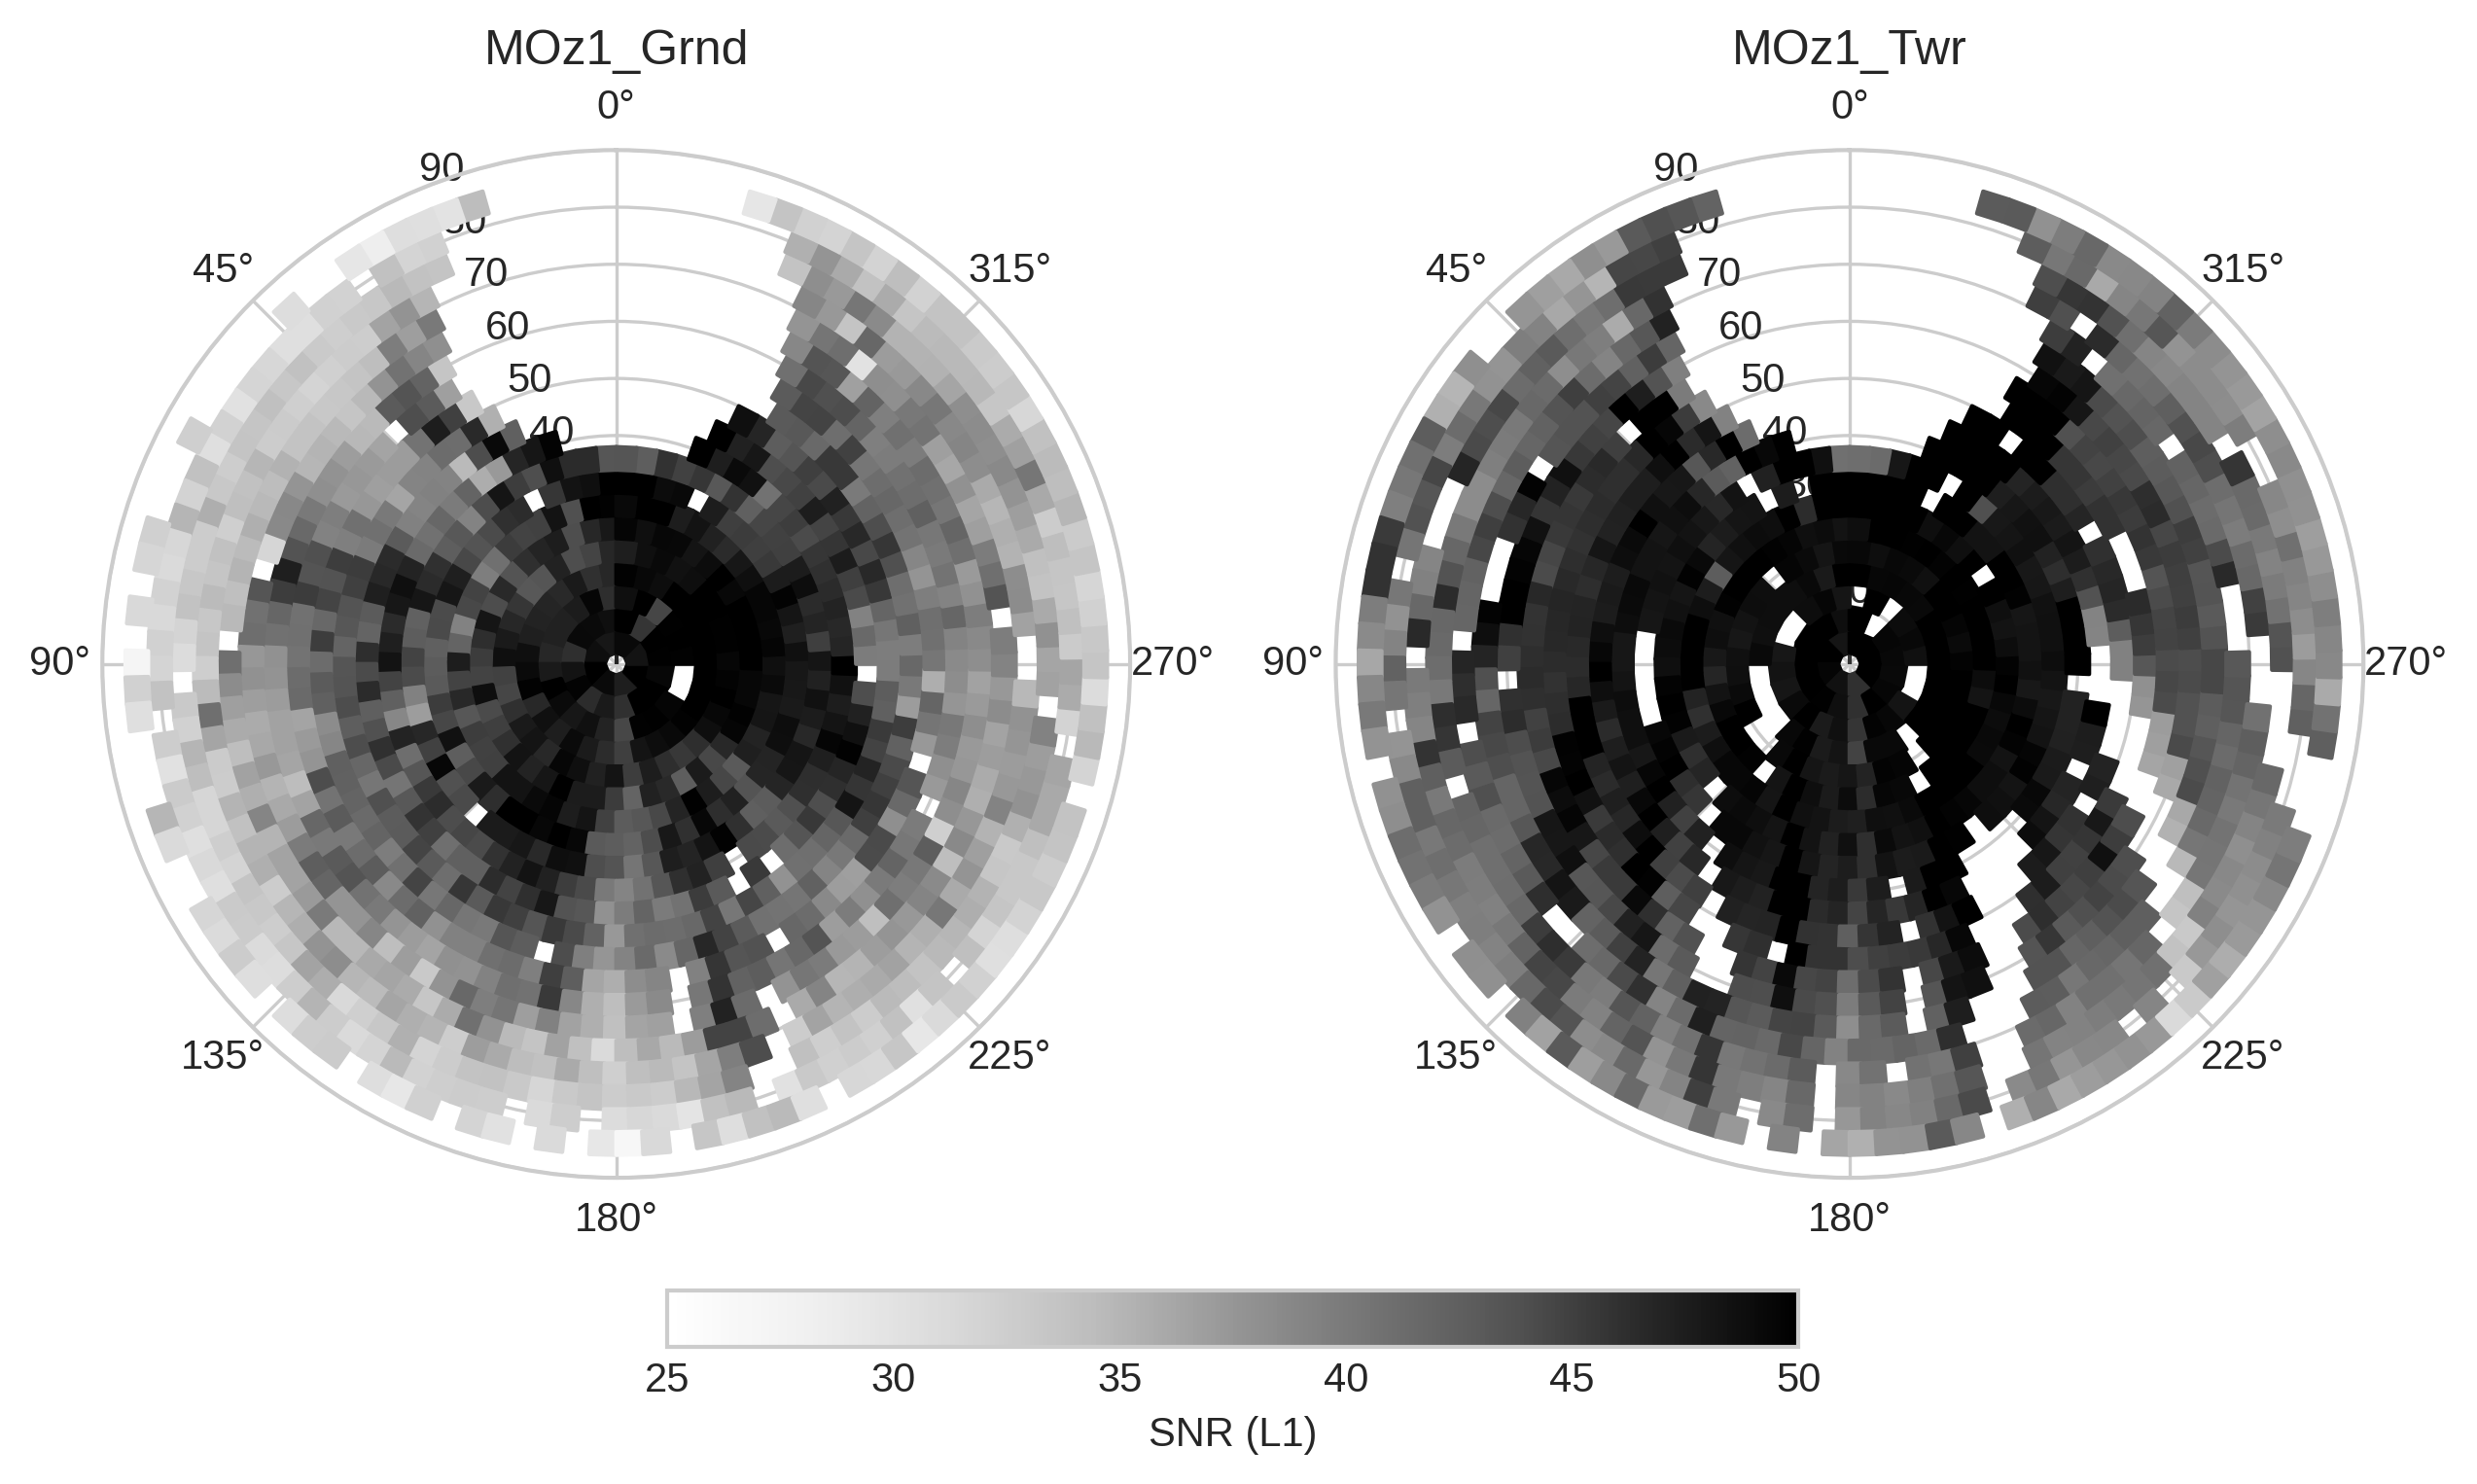

In [30]:
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_average.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([25,50])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')
plt.savefig('figures/illustration_snr.png',facecolor='white', transparent=False,bbox_inches='tight')

We can also look at the number of observations by calculating another statistic

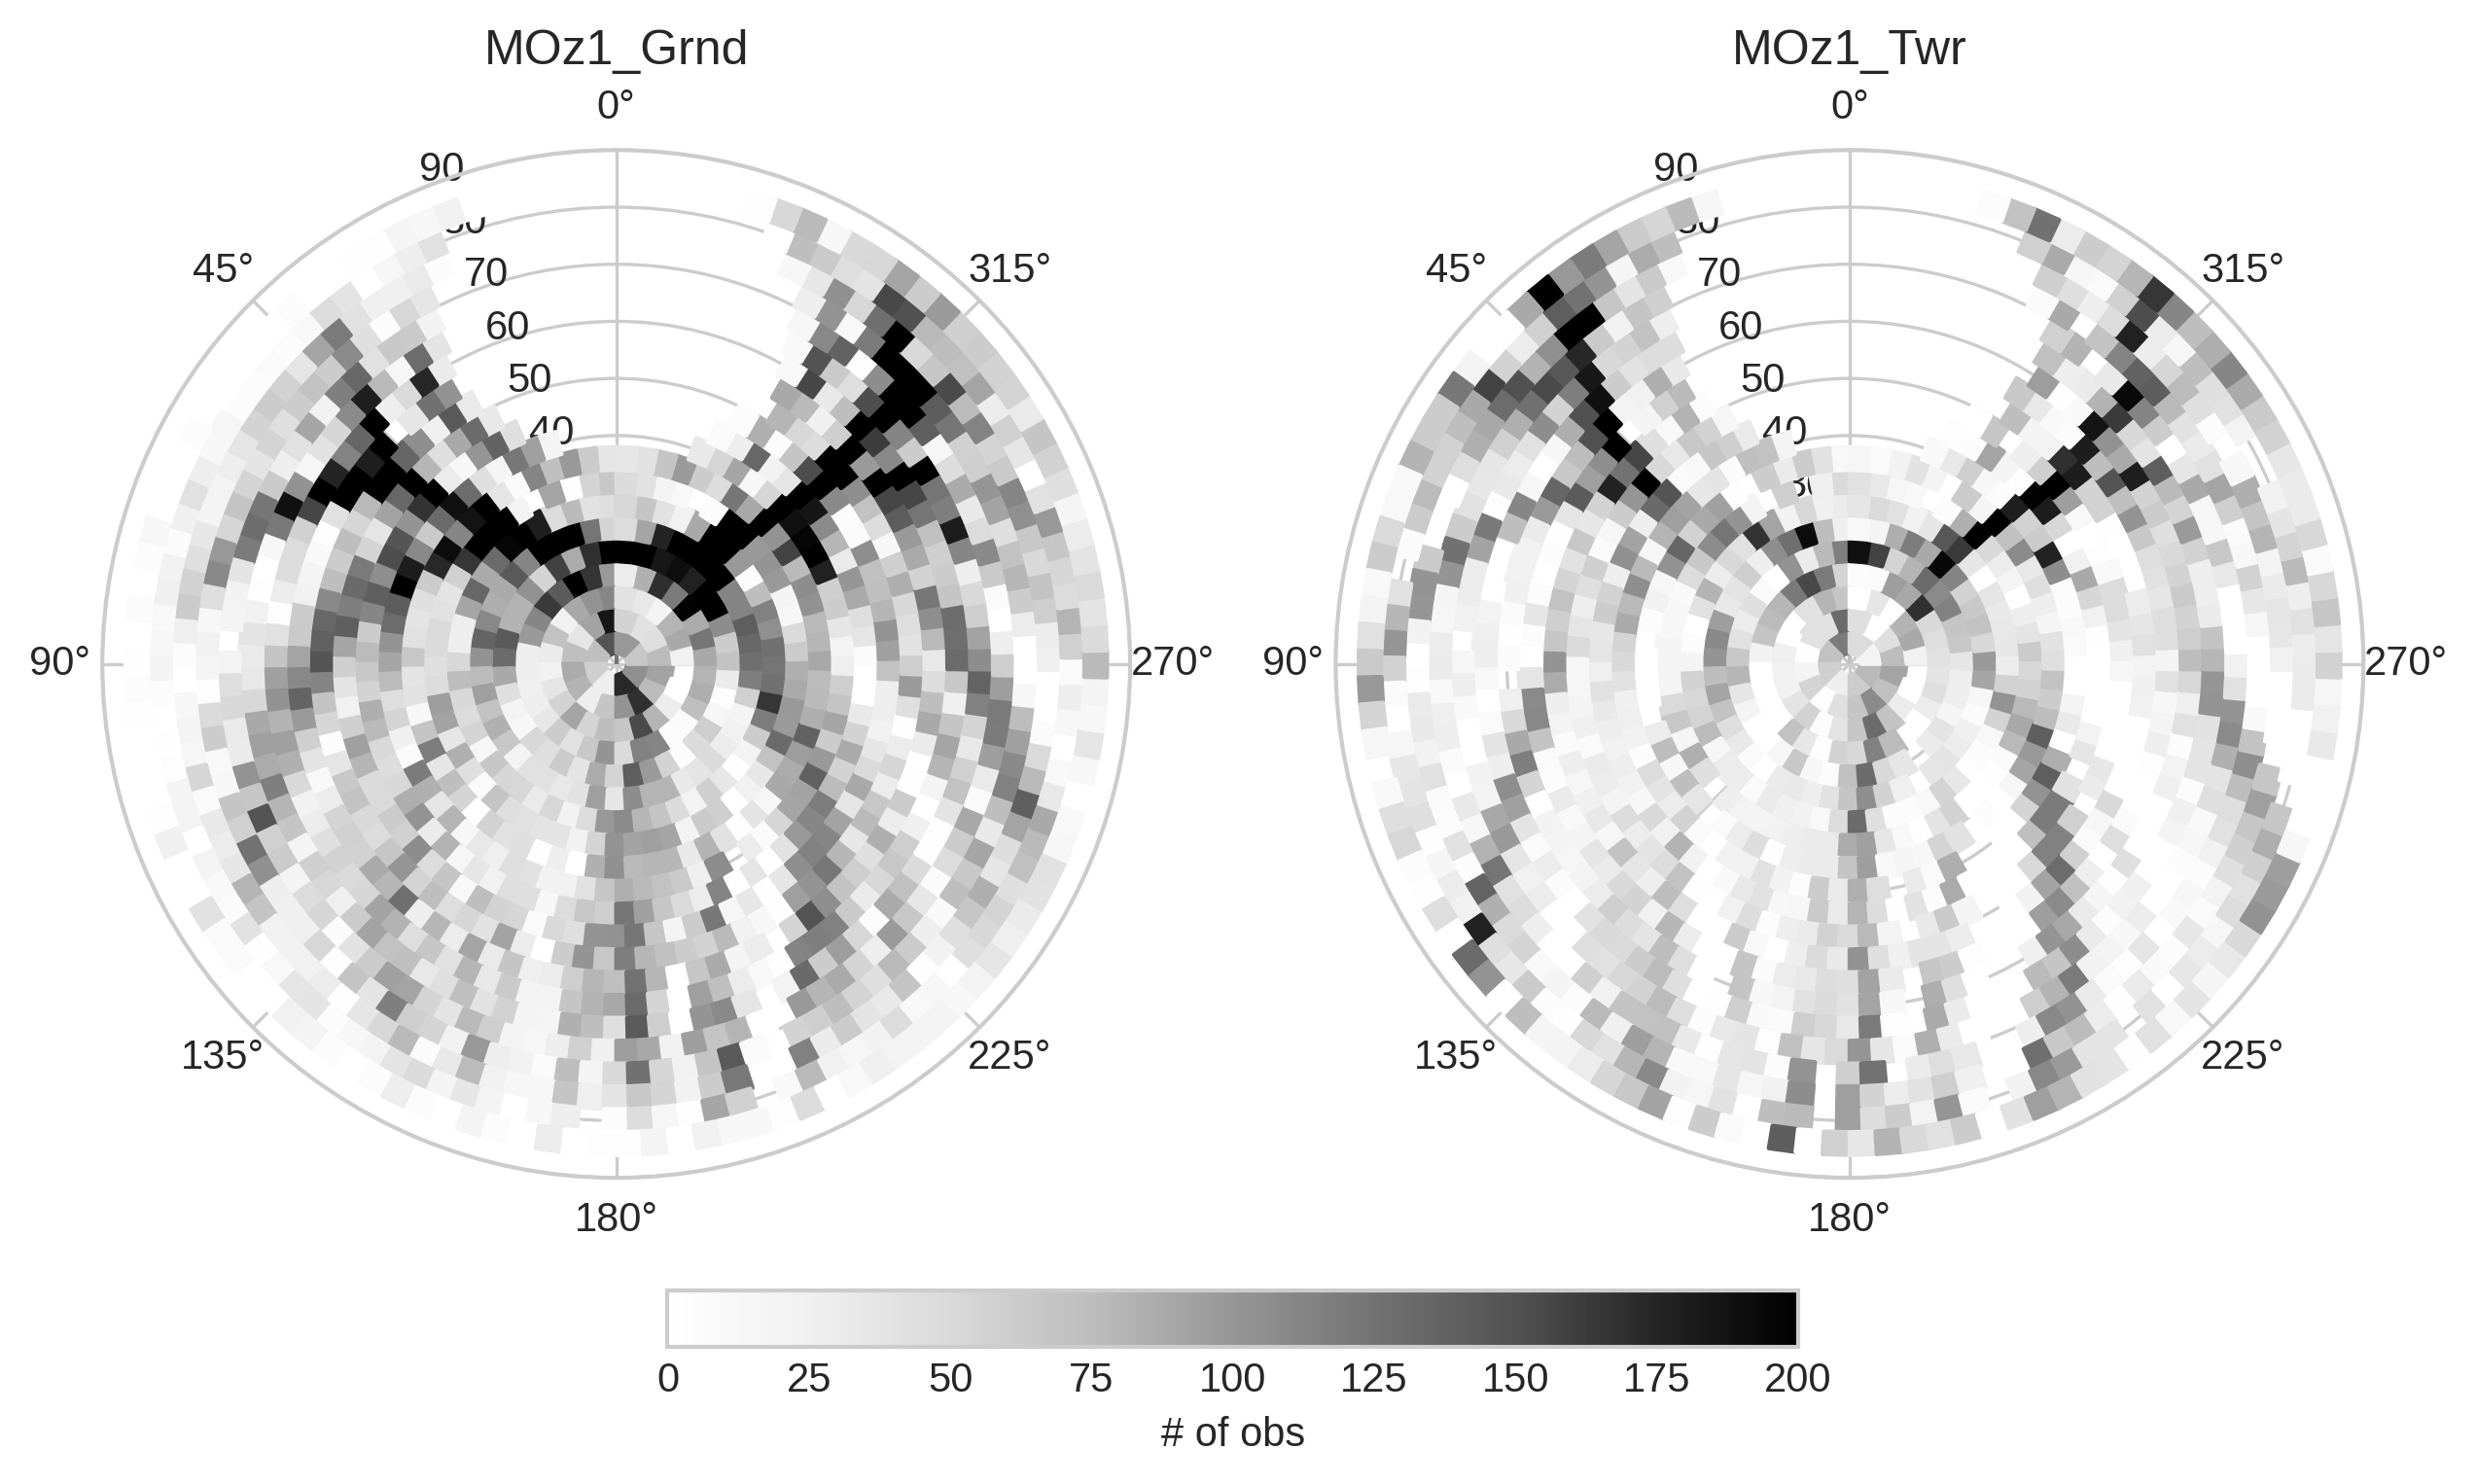

In [31]:
hemi_count = newdf.groupby(['CellID','Station']).count()
hemi_count

fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_count.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([0,200])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='# of obs')

In the next notebook, we illustrate how to calculate and plot GNSS-VOD.